# HW3: Логистическая регрессия, оптимизация, подбор гиперпараметров.

## Ф.И.О: Бедрин Павел Александрович

По вопросам в задании писать в беседу курса или в лс (tg: @Skorik_S)

## Задание 1: Теоретическая часть

Постановка задачи логистической регрессии:
$$
    \mathcal{L}(\theta, X, y) = \dfrac{1}{N}\sum_{i=1}^N\log(1 + e^{-y_i\langle\theta, x_i\rangle}) → \min_{θ \in \mathbb{R}^d}, \tag{1}
$$

в которой


1.   $θ \in \mathbb{R}^d$ -- вектор параметров модели.
2.   $(x_i, y_i)$ -- обучающая пара. В данной постановке $y = \{-1, 1\}$.



### Задача 0 (0.5 баллов)

1. *Получите постановку логистической регрессии, используя принцип максимума правдоподобия в предположении $y = \{0, 1\}$.*
2. Проверьте, что если метки классов $y = \{-1, 1\}$, то полученная постановка примет вид (1).
---

#### Ваше решение:

**1 пункт.**

Пусть метки классов $y = \{0, 1\}$, тогда:

* $P(y=1|X,\theta) = \sigma(\langle\theta,X\rangle) = \frac{1}{1 + e^{-\langle\theta,X\rangle}}$

* $P(y=0|X,\theta) = 1 - \sigma(\langle\theta,X\rangle) = \frac{e^{-\langle\theta,X\rangle}}{1 + e^{-\langle\theta,X\rangle}} = \sigma(-\langle\theta,X\rangle)$

* $P(y|X,\theta) = \prod_{i=1}^N P(y=1|x_i,\theta)^{y_i} \cdot P(y=0|x_i,\theta)^{1-y_i} $.

Нормируем, перейдем к логарифму и задаче минимизации:

$\mathcal{L}(\theta, X, y) = -\frac{1}{N}\sum_{i=1}^N [y_i\log(\sigma(\langle\theta,x_i\rangle)) + (1-y_i)\log(\sigma(-\langle\theta,x_i\rangle))] =$

$ = -\frac{1}{N}\sum_{i=1}^N [y_i\log(\frac{1}{1 + e^{-\langle\theta,x_i\rangle}}) + (1-y_i)\log(\frac{1}{1 + e^{\langle\theta,x_i\rangle}})] =$

$ = \frac{1}{N}\sum_{i=1}^N [y_i\log(1 + e^{-\langle\theta,x_i\rangle}) + (1-y_i)\log(1 + e^{\langle\theta,x_i\rangle})] → \min_{θ \in \mathbb{R}^d}$

**2 пункт.**

Если метки классов $y = \{-1, 1\}$, будут другие индикаторные функции

* $P(y|X,\theta) = \prod_{i=1}^N P(y=1|x_i,\theta)^{\frac{1+y_i}{2}} \cdot P(y=-1|x_i,\theta)^{\frac{1-y_i}{2}} $

$\mathcal{L}(\theta, X, y) = -\frac{1}{N}\sum_{i=1}^N [\frac{1+y_i}{2}\log(\frac{1}{1 + e^{-\langle\theta,x_i\rangle}}) + \frac{1-y_i}{2}\log(\frac{1}{1 + e^{\langle\theta,x_i\rangle}})] = $

$ = \frac{1}{N}\sum_{i=1}^N [\frac{1+y_i}{2}\log(1 + e^{-\langle\theta,x_i\rangle}) + \frac{1-y_i}{2}\log(1 + e^{\langle\theta,x_i\rangle})] → \min_{θ \in \mathbb{R}^d}$

Здесь вместо индикаторных функций можно внести $y_i$ в экспоненту, получим искомый результат.

$\mathcal{L}(\theta, X, y) = \dfrac{1}{N}\sum_{i=1}^N\log(1 + e^{-y_i\langle\theta, x_i\rangle}) → \min_{θ \in \mathbb{R}^d}$


### Задача 1 (2 балла)

1. Покажите, что градиент функции потерь равен:

$$\nabla \mathcal{L}(\theta, X, y) = - \dfrac{1}{N}\sum_{i=1}^N \dfrac{y_i x_{i}e^{-y_i\langle\theta, x_i\rangle}}{1 + e^{-y_i\langle\theta, x_i\rangle}} $$

2. Покажите, что гессиан функции потерь равен:

$$ \nabla^2 \mathcal{L}(\theta, X, y) = \dfrac{1}{N}X^\top D X, \tag{2}$$
где $D$ -- диагональная матрица с элементами $\sigma(-y_i\langle\theta, x_i\rangle)(1 - \sigma(-y_i\langle\theta, x_i\rangle))$, где $\sigma(\cdot)$ -- функция сигмоиды

---

#### Ваше решение:

**1 пункт.**

$\mathcal{L}(\theta, X, y) = \dfrac{1}{N}\sum_{i=1}^N\log(1 + e^{-y_i\langle\theta, x_i\rangle})$

$\nabla_\theta \log(1 + e^{-y_i\langle\theta, x_i\rangle}) = \frac{1}{1 + e^{-y_i\langle\theta, x_i\rangle}} \cdot \nabla_\theta(1 + e^{-y_i\langle\theta, x_i\rangle}) = \frac{1}{1 + e^{-y_i\langle\theta, x_i\rangle}} \cdot e^{-y_i\langle\theta, x_i\rangle} \cdot \nabla_\theta(-y_i\langle\theta, x_i\rangle) = \frac{1}{1 + e^{-y_i\langle\theta, x_i\rangle}} \cdot e^{-y_i\langle\theta, x_i\rangle} \cdot (-y_i x_i) = - \dfrac{y_i x_{i}e^{-y_i\langle\theta, x_i\rangle}}{1 + e^{-y_i\langle\theta, x_i\rangle}}$

Возвращаем сумму и нормирование:
$\nabla \mathcal{L}(\theta, X, y) = - \dfrac{1}{N}\sum_{i=1}^N \dfrac{y_i x_{i}e^{-y_i\langle\theta, x_i\rangle}}{1 + e^{-y_i\langle\theta, x_i\rangle}} $

**2 пункт.**

$\frac{\partial^2}{\partial \theta^2} \log(1 + e^{-y_i\langle\theta, x_i\rangle}) = \frac{\partial}{\partial \theta}\left(-\frac{y_i x_i e^{-y_i\langle\theta, x_i\rangle}}{1 + e^{-y_i\langle\theta, x_i\rangle}}\right) = -\frac{(-y_i^2 x_i x_i^\top e^{-y_i\langle\theta, x_i\rangle})(1 + e^{-y_i\langle\theta, x_i\rangle}) - (y_i x_i e^{-y_i\langle\theta, x_i\rangle})(-y_i x_i e^{-y_i\langle\theta, x_i\rangle})}{(1 + e^{-y_i\langle\theta, x_i\rangle})^2} = $

$= \frac{y_i^2 x_i x_i^\top e^{-y_i\langle\theta, x_i\rangle}}{(1 + e^{-y_i\langle\theta, x_i\rangle})^2} = \{y_i^2 = 1\} = x_i x_i^\top \sigma(-y_i\langle\theta, x_i\rangle)(1 - \sigma(-y_i\langle\theta, x_i\rangle))$

Возвращаем сумму и нормирование:

$\nabla^2 \mathcal{L}(\theta, X, y) = \frac{1}{N}\sum_{i=1}^N x_i x_i^\top \sigma(-y_i\langle\theta, x_i\rangle)(1 - \sigma(-y_i\langle\theta, x_i\rangle)) = \frac{1}{N}X^\top D X$

### Задача 2* (1 балл)

1. Покажите что в выражении (2) $\nabla^2\mathcal{L} \succeq 0$. Что это говорит об $\mathcal{L}$ и её экстремумах?

2. В каких случаях в выражении (2) $\nabla^2\mathcal{L} \succ 0$? Что в этом случае мы можем сказать о глобальном минимуме? Всегда ли он существует? Ответ обоснуйте.

---

#### Ваше решение:*

**1 пункт.**

Для доказательства положительной полуопределенности гессиана нужно доказать, что $u^\top \nabla^2\mathcal{L} u ≥ 0$, где $u \neq 0$, $u$ - произвольный вектор.

$u^\top \nabla^2\mathcal{L} u = u^\top (\frac{1}{N}X^\top D X) u = \frac{1}{N}(Xu)^\top D (Xu)$

* Диагональные элементы $D$ - это $\sigma(-y_i\langle\theta, x_i\rangle)(1 - \sigma(-y_i\langle\theta, x_i\rangle))$. При этом $\sigma(.) \in (0,1)$. Значит, все диагональные элементы $D$ положительны.

* Пусть $v = Xu$, тогда $v^\top D v = \sum_{i=1}^N d_{ii}v_i^2 \geq 0$

В результате: $u^\top \nabla^2\mathcal{L} u = \frac{1}{N}(Xu)^\top D (Xu) = \frac{1}{N} v^\top D v \geq 0$.
Отсюда следует, что $\nabla^2\mathcal{L} \succeq 0$.

Из положительной полуопределенности гессиана следует, что функция $\mathcal{L}$ выпуклая. Локальный минимум выпуклой функции является также глобальным минимумом.

**2 пункт.**

$u^\top \nabla^2\mathcal{L} u = \frac{1}{N}(Xu)^\top D (Xu) = \frac{1}{N} v^\top D v$. С диагональными элементами $D$ всё остаётся так же, они положительны. Нужно, чтобы элементы вектора $v = Xu$ были ненулевыми для любого ненулевого $u$. Это равносильно тому, что $X$ имеет полный ранг. То есть все признаки в матрице $X$ объектов-признаков линейно независимы.

В случае строгой положительности гессиана, функция $\mathcal{L}$ строго выпуклая, есть не более одного глобального минимума.

Регуляризируем исходную задачу:
$$
\mathcal{L}(\theta, X, y) = \dfrac{1}{N}\sum_{i=1}^N\log(1 + e^{-y_i\langle\theta, x_i\rangle}) + \dfrac{\lambda}{2}\|\theta\|^2 → \min_{θ \in \mathbb{R}^d}, \tag{3}
$$
здесь $\lambda > 0$ -- параметр регуляризации. Задача (3) представляет собой *минимизацию эмпирического риска*

### Задача 3 (2 балла)

1. Покажите, что задача (3) L-гладкая с константой $$L = \dfrac{1}{4N}\lambda_{max}(XX^\top) + \lambda \tag{4}.$$

2. Покажите, что задача (3) $\mu$-сильно-выпуклая с константой $\mu = λ$.

Для доказательства п.1 и п.2 воспользуйтесь тем, что $L = \lambda_{max}(\nabla^2 \mathcal{L}(\theta, X, y))$ и $\mu = \lambda_{min}(\nabla^2 \mathcal{L}(\theta, X, y))$, где $\lambda_{max}(\cdot)$ и $\lambda_{min}(\cdot)$ -- максимальное и минимальное собственное значение матрицы.

---

#### Ваше решение:

**1 пункт.**

Гессиан регуляризованной функции $\mathcal{L}$: $\nabla^2\mathcal{L} = \frac{1}{N}X^\top D X + \lambda I$. 

По условию: $L = \lambda_{max}(\nabla^2 \mathcal{L}) = \lambda_{max}(\frac{1}{N}X^\top D X + \lambda I)$ 

$(\sigma(z)(1-\sigma(z)) \leq \frac{1}{4}$ для любого $z$, то есть диагональные элементы $D$ не превосходят $\frac{1}{4}$. Равенство достигается в точке, где $\sigma(z) = \frac{1}{2}$. В этой точке максимум собственного значения: 

$\lambda_{max}(\frac{1}{N}X^\top D X) = \frac{1}{4N}\lambda_{max}(XX^\top)$

После добавления регуляризатора:
$\lambda_{max}(\frac{1}{N}X^\top D X + \lambda I)= \frac{1}{4N}\lambda_{max}(XX^\top) + \lambda = L$

**2 пункт.**

Нужно показать, что $\nabla^2\mathcal{L} \succeq \mu I$, то есть $\frac{1}{N}X^\top D X + \lambda I \succeq \mu I$.

Уже знаем, что гессиан $\frac{1}{N}X^\top D X$ - положительно полуопределенная матрица. Тогда $\lambda_{min}\left(\frac{1}{N}X^\top D X\right) \geq 0$. Тогда после добавления регуляризации:
$\lambda_{min}(\nabla^2 \mathcal{L}) = \lambda_{min}\left(\frac{1}{N}X^\top D X + \lambda I\right) \geq \lambda$.

Отсюда $\nabla^2 \mathcal{L} \succeq \lambda I$, $\mu = \lambda$.


### Задача 4* (1 балл)

1. Всегда ли существует глобальный минимум задачи (3)? Ответ обоснуйте.

---

#### Ваше решение:*

При линейно разделимых данных и отсутствии регуляризации глобальный оптимум находится в бесконечности и недостижим. Однако в (3) мы добавляем регуляризатор, что даёт нам конечный глобальный минимум.

## Задание 2: Сравнение алгоритмов оптимизации

Для практической части мы пользуемся библиотекой `numpy`: [документация](https://numpy.org/doc/)

Не пользуйтесь другими библиотеками (`torch`, `jax` итп)

In [1]:
from typing import Callable
import time
from functools import partial
from tqdm import tqdm
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import requests

Подготовим данные

In [2]:
url = 'https://drive.google.com/uc?id=1lgwawQxGD_6XruWbquMH6W2yKPVQ5kdi'
filename = 'mushrooms.txt'

response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)

In [3]:
data = load_svmlight_file(filename)
mushrooms_x, mushrooms_y = data[0].toarray(), data[1]
# сделаем y -1 или 1
mushrooms_y = 2 * mushrooms_y - 3

Разделим данные на train/test

**Важно:** не меняйте код ниже. random_state зафиксирован для воспроизводимости.

In [4]:
train_mush_x, test_mush_x, train_mush_y, test_mush_y = train_test_split(
    mushrooms_x, mushrooms_y, test_size=0.2, random_state=42
)

print(f"{train_mush_x.shape=}")
print(f"{train_mush_y.shape=}")

train_mush_x.shape=(6499, 112)
train_mush_y.shape=(6499,)


### Задача 0 (1 балл)

Найдите константу гладкости $L$ согласно (4) на практике для `train_mush_x`.

---

In [5]:
def get_lipschitz(x_values: np.ndarray) -> float:
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    eigenvalues, _ = np.linalg.eig(x_values @ x_values.T)
    L = (1 / (4 * x_values.shape[0])) * np.max(eigenvalues)
    lambda_value = 0.001 * L
    return L + lambda_value

In [6]:
def assert_lipschitz(get_lipschitz: Callable) -> None:
    true_lipschitz = 2.5872260889612666
    your_lipschitz = get_lipschitz(train_mush_x)
    assert np.allclose(true_lipschitz, your_lipschitz, atol=1e-6), "Failed on get_lipschitz(train_mush_x)"
    print("Success!!!")

assert_lipschitz(get_lipschitz)

Success!!!


In [7]:
lipschitz_mush = get_lipschitz(train_mush_x)
lambda_mush = lipschitz_mush / 1000

### Задача 1 (1 балл)

Реализуйте посчет значения, градиента и гессиана целевой функции (3).

In [8]:
def mush_exp(x: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
    # TODO: Calculate exp(-y * <w,x>)
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    return np.exp(-y * (x @ w))


def mush_f(
    w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y
) -> float:
    # TODO: Calculate loss function
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    return np.mean(np.log(1 + mush_exp(x, y, w))) + (lambda_mush / 2) * np.linalg.norm(w)**2


def mush_grad(
    w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y
) -> np.ndarray:
    # TODO: Calculate gradient of loss function
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    return -np.mean((y[:, np.newaxis] * x) / (1 + mush_exp(x, -y, w)[:, np.newaxis]), axis=0) + lambda_mush * w


def sigmoid(w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y) -> np.ndarray:
    return 1 / (1 + mush_exp(x, y, w))


def mush_hess(
    w: np.ndarray, x: np.ndarray = train_mush_x, y: np.ndarray = train_mush_y
) -> np.ndarray:
    # TODO: Calculate hessian of loss function
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    D = np.diag(sigmoid(w, x, -y) * (1 - sigmoid(w, x, -y)))
    return (1 / x.shape[0]) * (x.T @ D @ x) + lambda_mush * np.eye(x.shape[1])


def mush_accuracy(
    w: np.ndarray, x: np.ndarray = test_mush_x, y: np.ndarray = test_mush_y
) -> float:
    if len(x) == 0:
        return 0
    return np.mean((np.sign(x @ w) == y))

In [9]:
def assert_mush(mush_f: Callable, mush_grad: Callable, mush_hess: Callable):
    w = np.zeros(train_mush_x[0].shape[0])
    assert np.allclose(mush_f(w), 0.6931471805599453, atol=1e-6), "Failed on mush_f(w) for w=0"
    assert np.allclose(mush_grad(w).sum(), -0.3732112632712724, atol=1e-6), "Failed on mush_grad(w) for w=0"
    assert np.allclose(mush_hess(w).sum(), 110.53976932196366, atol=1e-6), "Failed on mush_hess(w) for w=0"

    w = np.ones(train_mush_x[0].shape[0])
    assert np.allclose(mush_f(w), 10.271673398468815, atol=1e-6), "Failed on mush_f(w) for w=1"
    assert np.allclose(mush_grad(w).sum(), 10.416558042769106, atol=1e-6), "Failed on mush_grad(w) for w=1"
    assert np.allclose(mush_hess(w).sum(), 0.2897696563545762, atol=1e-6), "Failed on mush_hess(w) for w=1"
    print("Success!!!")

assert_mush(mush_f, mush_grad, mush_hess)

Success!!!


### Задача 2 (2 балла)

Рассмотрим и реализуем метод градиентного спуска (Gradient Descent)

$$
\begin{equation*}
w_{k+1} = w_k - \gamma_k \nabla \mathcal{L}(w_k)
\end{equation*}
$$

In [10]:
# Фиксируем рандомизацию для воспроизводимости
seed = 42
np.random.seed(seed)
start_w_mush = np.random.randn(train_mush_x.shape[1])

In [11]:
# Базовый класс оптимизатора
class ManualSolver:
    def __init__(
        self,
        lr: float | Callable, # Скорость обучения
        name: str, # Название оптимизатора (для логгирования)
        first_order: bool, # Использует ли оптимизатор grad_f
        second_order: bool, # Использует ли оптимизатор hess_f
    ) -> None:
        super().__init__()
        self.name = name
        self.lr = lr if isinstance(lr, Callable) else lambda _: lr
        self.first_order = first_order
        self.second_order = second_order

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: np.ndarray) -> np.ndarray:
        # эту функцию должны переопределить наследуемые классы
        raise NotImplementedError

#### Задача 2.1

Реализуйте шаг обучения и тестирования.

**Важно:** критерием сходимости является отношение $\frac{\| \nabla f(w^k) \|}{\| \nabla f(w^0) \|}$ на **обучающей** выборке. В связи с этим, подсчет `grad_norm`$=\| \nabla f(w^k) \|$ необходимо производить на обучающей выборке `train_mush_x`.

Подсчет точности и лосса в `eval_optimizer_step` проводятся на тестовой выборке.

In [12]:
def train_optimizer_step(
    optimizer: ManualSolver,
    w: np.ndarray,
    iter_num: int,
    x: np.ndarray = train_mush_x,
    y: np.ndarray = train_mush_y
) -> np.ndarray:
    # TODO: implement train_step pipeline;
    # OUTPUT: Updated training weights
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    grad_f = mush_grad(w) if optimizer.first_order else None
    hess_f = mush_hess(w) if optimizer.second_order else None
    updated_w = optimizer.step(w, iter_num, grad_f, hess_f)
    return updated_w

In [13]:
def eval_optimizer_step(
    w: np.ndarray,
    x: np.ndarray = test_mush_x,
    y: np.ndarray = test_mush_y
) -> list[float, float, float]:
    # TODO: implement eval pipeline;
    # OUTPUT: [grad_norm, accuracy, val_loss]
    # You need to calculate `grad_norm` on train_mush_x!!
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    # train_mush_x = train_mush_x # here is a global variable
    # train_mush_y = train_mush_y
    grad_norm = np.linalg.norm(mush_grad(w, train_mush_x, train_mush_y))
    accuracy = mush_accuracy(w, x, y)
    val_loss = mush_f(w, x, y)
    return [grad_norm, accuracy, val_loss]

In [14]:
def test_optimizer(
    optimizer: ManualSolver,
    max_iters: int = 1000,
    start_w: np.ndarray = start_w_mush,
    stop_criterion: float = 1e-8,
) -> dict:

    accuracies = []
    losses = []
    criterion_logs = []  # нормы градиента или что-то другое
    time_logs = []

    w = start_w.copy()

    # initial eval
    start_grad_norm, accuracy, val_loss = eval_optimizer_step(w)
    time_logs.append(0)
    criterion_logs.append(start_grad_norm / start_grad_norm)
    accuracies.append(accuracy)
    losses.append(val_loss)

    start_time = time.time()

    with tqdm(range(max_iters), desc=optimizer.name) as loop:
        for k in loop:
            # train
            w = train_optimizer_step(optimizer, w, k)
            # eval
            grad_norm, accuracy, val_loss = eval_optimizer_step(w)
            criterion_logs.append(grad_norm / start_grad_norm)
            accuracies.append(accuracy)
            losses.append(val_loss)
            time_logs.append(time.time() - start_time)
            loop.set_postfix(
                {"Loss": val_loss, "Accuracy": accuracy, "Grad norm": grad_norm / start_grad_norm}
            )
            # Остановить, если criterion <= stop_criterion
            if grad_norm / start_grad_norm <= stop_criterion:
                break

    results_dict = {
        "name": optimizer.name,
        "num_iters": list(range(len(accuracies))),
        "Time": time_logs,
        "Accuracy": accuracies,
        "Criterion": criterion_logs,
        "Loss": losses,
        "W": w.copy(),
    }

    return results_dict

In [15]:
def plot_results(results_dictionaries: list, title: str, metrics_type: list = ['Criterion'], x: str = 'num_iters') -> None:
    valid_metrics = {'Criterion', 'Accuracy', 'Loss'}
    assert all(metric in valid_metrics for metric in metrics_type), \
        f"All metrics should be one of {valid_metrics}, got {metrics_type}"

    assert x in ['num_iters', 'Time'], f"x should be one of ['num_iters', 'Time'], got {x}"

    num_metrics = len(metrics_type)
    if num_metrics == 1:
        width = 10
    else:
        width = 6 * num_metrics
    fig, axs = plt.subplots(1, num_metrics, figsize=(width, 6), sharey=False)
    if num_metrics == 1:
        axs = [axs]

    for idx, metric_type in enumerate(metrics_type):
        ax = axs[idx]
        for results_dict in results_dictionaries:
            if metric_type == 'Criterion':
                ax.set_yscale('log')
            ax.plot(
                results_dict[x],
                results_dict[metric_type],
                label=results_dict["name"],
                linewidth=2
            )
        ylabel = f"log {metric_type}" if metric_type == 'Criterion' else metric_type
        ax.set_xlabel(x, fontsize=14)
        ax.set_ylabel(ylabel, fontsize=14)
        ax.legend(loc='best', fontsize=12)
        ax.grid(True)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

#### Задача 2.2

- Реализуйте метод шаг градиентного спуска (х баллов)
- Проведите оптимизацию гиперпараметров . Сравнения проиллюстрируйте на графике. Критерием задачи является $\frac{\| \nabla f(w^k) \|}{\| \nabla f(w^0) \|}$. Однако приветствуются также графики точности и функции потерь на тесте (x баллов):
1.  Протестируйте различные $\gamma_k = \gamma = \frac{s}{L}$, где $s \in [0, 3]$, $L$ -- константа липшица в задаче. Рассмотрите не менее 4-х $s$;
2. Протестируйте различные $\gamma_k = \frac{\gamma}{\delta + k}$, где $\gamma, \delta \in [1, 100]$. Рассмотрите не менее 4-х гиперпараметров;
3. Протестируйте различные $\gamma_k = \frac{\gamma}{\delta + \sqrt{k}}$, где $\gamma, \delta \in [1, 100]$. Рассмотрите не менее 4-х гиперпараметров;
4. Выберите лучшие $\gamma^1_k$, $\gamma^2_k$, $\gamma^3_k$ из п. 1-3 соответственно. Сделайте общий график, сравнивающий их. Также добавьте базовый $\gamma_k = \gamma = 10^{-3}$

In [16]:
class GradientDescent(ManualSolver):
    def __init__(self, lr, name) -> None:
        super().__init__(lr, name, True, False)
    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: None) -> np.ndarray:
        # TODO: init GradientDescent step
        # YOUR CODE HERE:
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return w - self.lr(k) * grad_f

GD lr=1e-3:   0%|          | 0/1000 [00:00<?, ?it/s]

GD lr=1e-3: 100%|██████████| 1000/1000 [00:12<00:00, 80.17it/s, Loss=1.12+0j, Accuracy=0.66, Grad norm=0.47] 


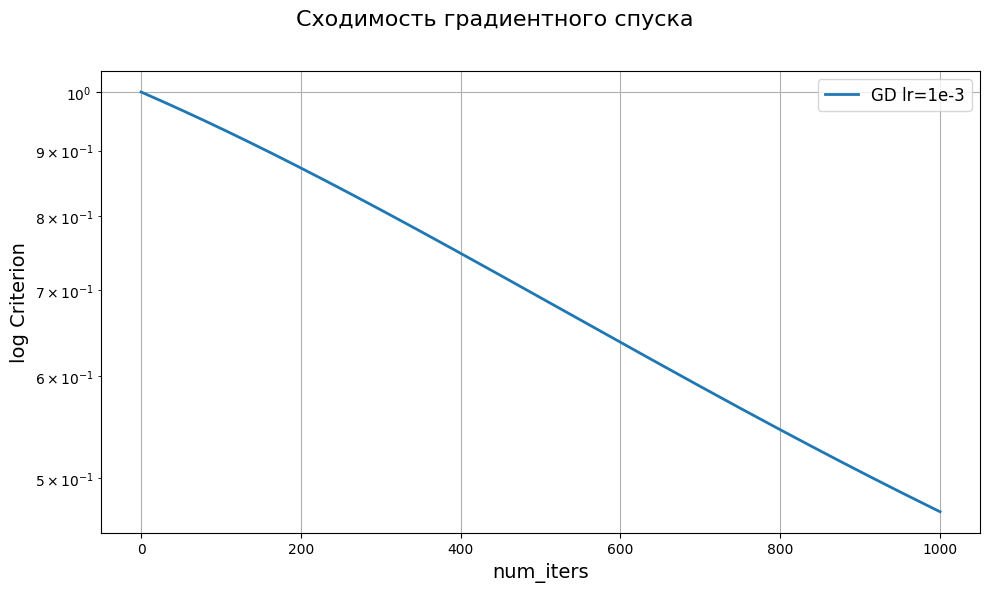

In [17]:
grad_opt = GradientDescent(lr=1e-3, name='GD lr=1e-3')
gd_res_baseline = test_optimizer(grad_opt)
plot_results([gd_res_baseline], 'Cходимость градиентного спуска')

In [18]:
# Функция для построения сравнительных графиков "три в ряд"

def plot_metrics(results_list, bottom_offset=0.5):
    fig, axes = plt.subplots(1, 3, figsize=(16, 7))    
    metrics = ['Criterion', 'Accuracy', 'Loss']
    
    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        lines = []
        for result in results_list:
            line, = ax.plot(result['num_iters'], np.real(result[metric]), label=result['name'], linewidth=2)
            lines.append(line)
            
        ax.set_xlabel('Iterations', fontsize=12)
        ax.set_ylabel(metric, fontsize=12)
        if metric == 'Criterion':
            ax.set_yscale('log')
        ax.grid(True)
        ax.set_title(metric, fontsize=14)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=bottom_offset)

    fig.legend(lines, [res['name'] for res in results_list],
              loc='center',
              bbox_to_anchor=(0.5, 0.15),
              ncol=1,
              fontsize=12)
    
    plt.show()

In [19]:
1.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
experiments_2_1 = []
for s in [0.5, 1, 2, 3]:
    lr = s / lipschitz_mush
    grad_opt = GradientDescent(lr=lr, name=f'GD: γ_k=s/L: s={s} lr={lr:.3f}')
    res = test_optimizer(grad_opt)
    experiments_2_1.append(res)

GD: γ_k=s/L: s=0.5 lr=0.193+0.000j:   0%|          | 0/1000 [00:00<?, ?it/s, Loss=1.2+0j, Accuracy=0.649, Grad norm=0.526] 

GD: γ_k=s/L: s=3 lr=1.160+0.000j: 100%|██████████| 1000/1000 [00:12<00:00, 78.08it/s, Loss=0.0835+0j, Accuracy=0.996, Grad norm=0.000599]


Лучший результат: $\gamma^1_k=1.16$ $(s = 3)$

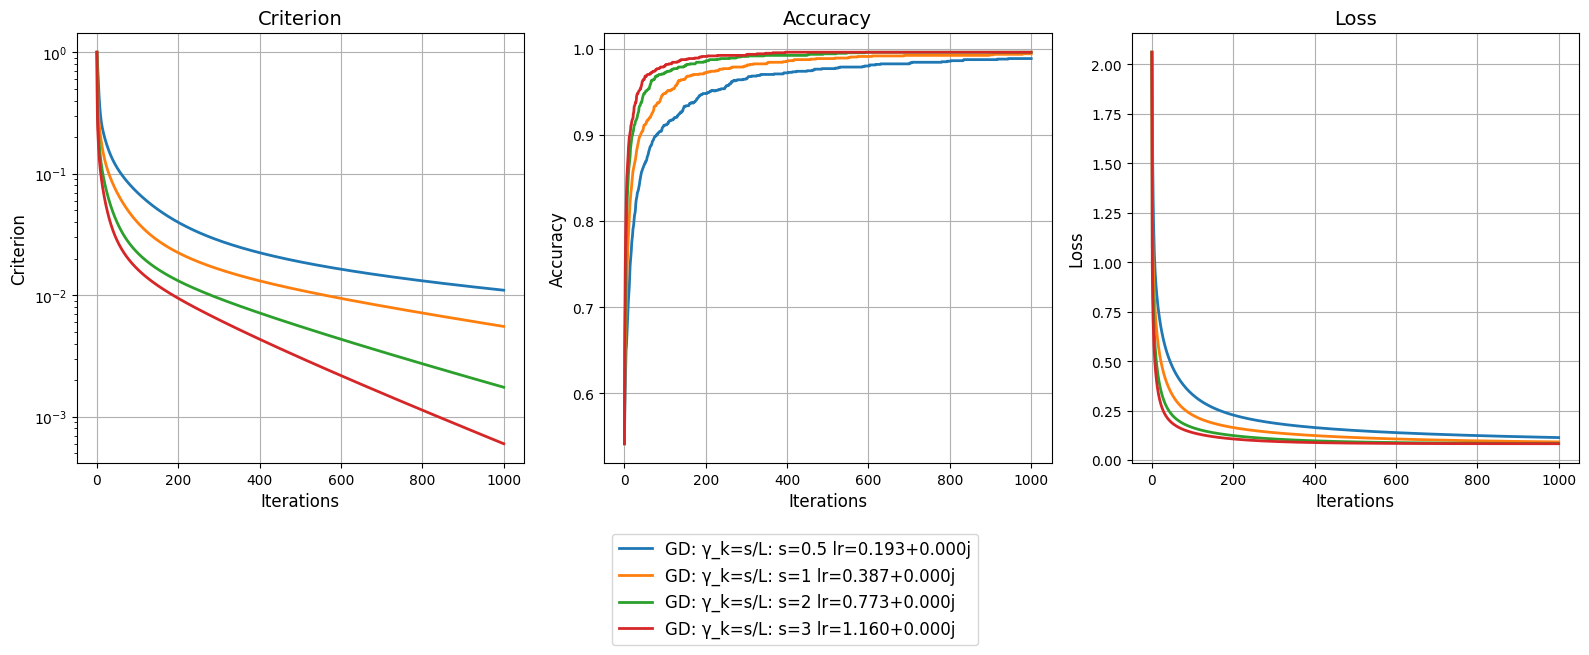

In [20]:
plot_metrics(experiments_2_1, bottom_offset=0.33)

In [21]:
2.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

def dynamic_lr(initial_gamma, delta):
    # TODO: return a lambda function that depends on k
    return lambda k: initial_gamma / (delta + k)

experiments_2_2 = []
for initial_gamma in [10, 100]:
    for delta in [1, 10, 50, 100]:
        lr = dynamic_lr(initial_gamma, delta)
        grad_opt = GradientDescent(lr=lr,
                                   name=f'GD: γ_k=γ/(δ+k): γ={initial_gamma} δ={delta}')
        res = test_optimizer(grad_opt)
        experiments_2_2.append(res)

GD: γ_k=γ/(δ+k): γ=100 δ=100: 100%|██████████| 1000/1000 [00:13<00:00, 76.38it/s, Loss=0.106+0j, Accuracy=0.992, Grad norm=0.00914]


Лучший результат для $\gamma^2_k$: $\gamma = 100, \delta = 10$

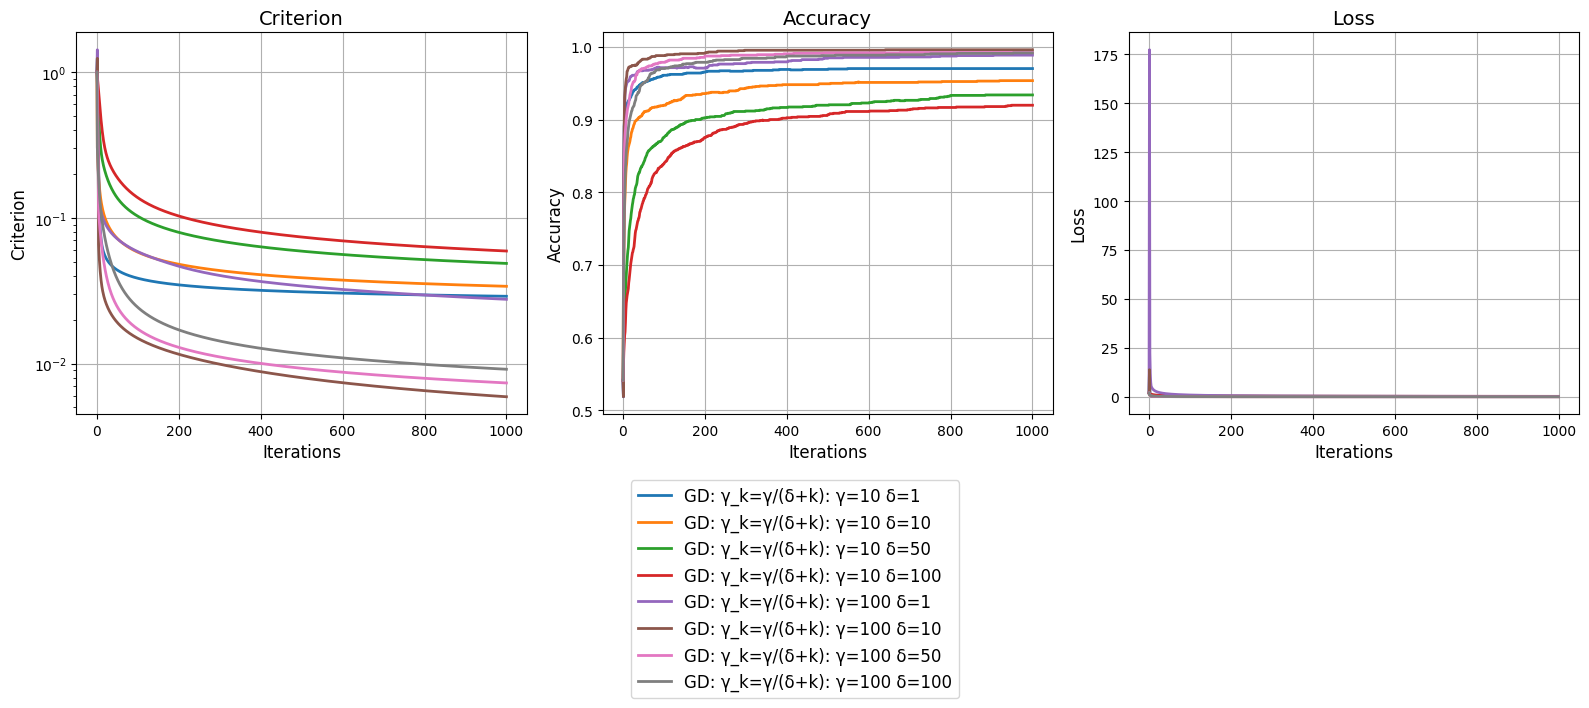

In [22]:
plot_metrics(experiments_2_2, bottom_offset=0.4)

In [23]:
3.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
def dynamic_lr_sqrt(initial_gamma, delta):
    # TODO: return a lambda function that depends on √k
    return lambda k: initial_gamma / (delta + np.sqrt(k))

experiments_2_3 = []
for initial_gamma in [1, 10, 100]:
    for delta in [1, 10, 50, 100]:
        lr = dynamic_lr_sqrt(initial_gamma, delta)
        grad_opt = GradientDescent(lr=lr, name=f'GD: γ_k=γ/(δ+√k): γ={initial_gamma} δ={delta}')
        res = test_optimizer(grad_opt)
        experiments_2_3.append(res)

GD: γ_k=γ/(δ+√k): γ=100 δ=100: 100%|██████████| 1000/1000 [00:14<00:00, 71.30it/s, Loss=0.0841+0j, Accuracy=0.996, Grad norm=0.00149]


Лучший результат для $\gamma^3_k$: $\gamma = 100, \delta = 1$

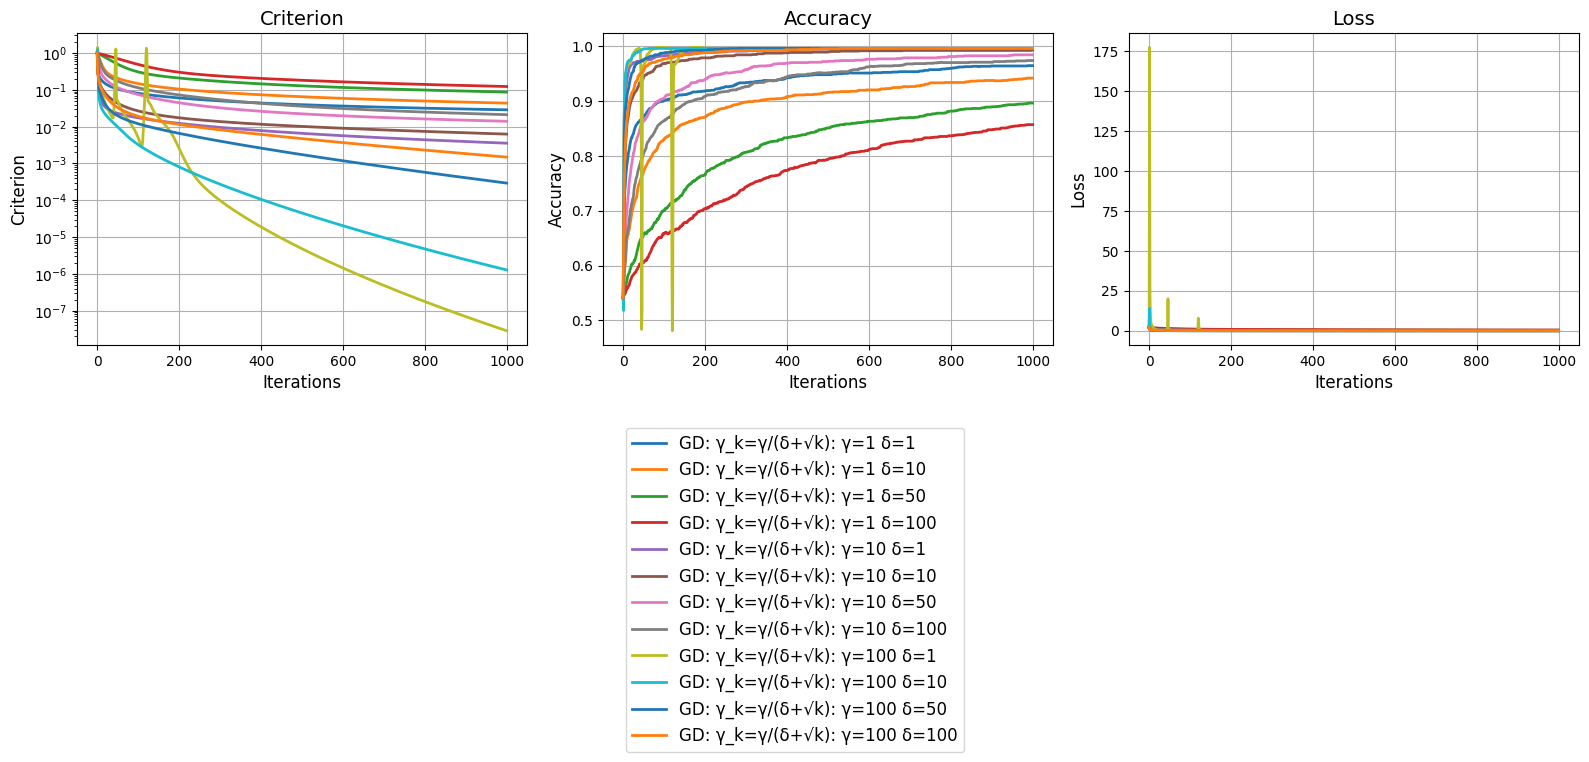

In [24]:
plot_metrics(experiments_2_3)

In [25]:
4.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
lr_candidates = [
    (1e-3, 'GD: base: lr=1e-3'),
    (3 / lipschitz_mush, 'GD: γ_k=s/L: s=3 lr=1.160+0.000j'),
    (dynamic_lr(100, 10), 'GD: γ_k=γ/(δ+k): γ=100 δ=10'),
    (dynamic_lr_sqrt(100, 1), 'GD: γ_k=γ/(δ+√k): γ=100 δ=1')
]
experiments_2 = []
for lr, name in lr_candidates:
    grad_opt = GradientDescent(lr=lr, name=name)
    res = test_optimizer(grad_opt)
    experiments_2.append(res)

GD: base: lr=1e-3:   0%|          | 0/1000 [00:00<?, ?it/s, Loss=2.05+0j, Accuracy=0.544, Grad norm=0.996]

GD: γ_k=γ/(δ+√k): γ=100 δ=1: 100%|██████████| 1000/1000 [00:10<00:00, 90.95it/s, Loss=0.0834+0j, Accuracy=0.996, Grad norm=2.86e-8]


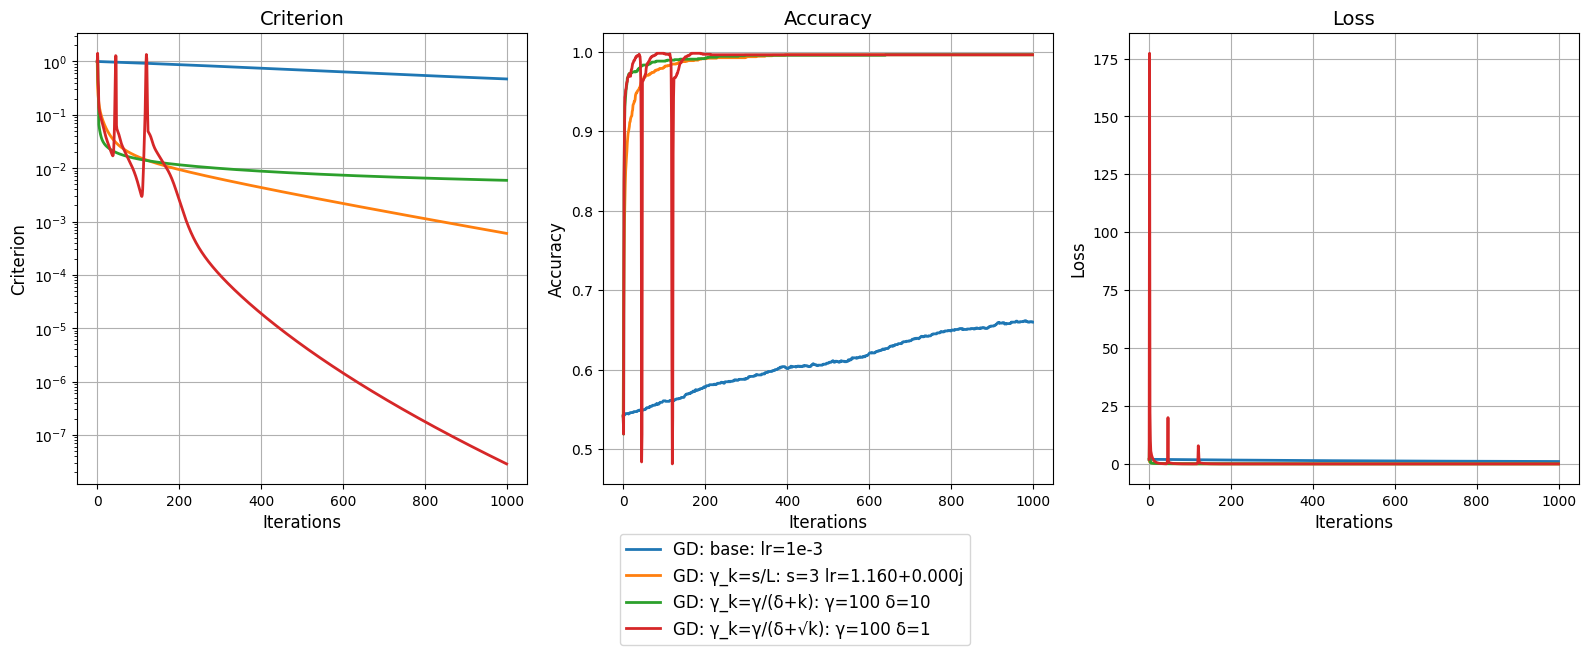

In [35]:
plot_metrics(experiments_2, bottom_offset=0.3)

Лучший результат: $\gamma_k = \frac{\gamma}{\delta + \sqrt{k}}$ с параметрами $\gamma = 100, \delta = 1$

In [55]:
best_final_gd_res = experiments_2[-1]

### Задача 3 (1 балл)

Рассмотрим метод тяжёлого шарика (Heavy Ball)

$$ w^{k+1} = w^k - \gamma_k \nabla \mathcal{L}(w^k) + \tau_k (w^k - w^{k-1}) $$

- Реализуйте шаг метода тяжёлого шарика
- Используйте шаг $\gamma = \frac{1}{L}$.
1. Рассмотрите моментум  $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и несколько моментумов в его окрестности: $s \cdot \tau$, где $s \in [0.9, 1.1]$. Рассмотрите не менее 3-х окрестностей.
2. Рассмотрите моментумы равные  $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ — номер итерации),
3. Сравните полученные результаты

In [28]:
class HeavyBall(ManualSolver):
    def __init__(self, lr, beta, init_w, name) -> None:
        super().__init__(lr, name, True, False)
        self.beta = beta if isinstance(beta, Callable) else lambda _: beta
        self.w_prev = init_w

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: None) -> np.ndarray:
        # TODO: implement heavy ball iteration step
        # YOUR CODE HERE:
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        w_new = w - self.lr(k) * grad_f + self.beta(k) * (w - self.w_prev)
        self.w_prev = w
        return w_new

In [29]:
1.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
experiments_3_1 = []
for s in [0.9, 1, 1.05, 1.1]:
    heaby_ball_opt = HeavyBall(lr=1 / lipschitz_mush,
                               beta=s * (np.sqrt(lipschitz_mush) - np.sqrt(lambda_mush)) / (np.sqrt(lipschitz_mush) + np.sqrt(lambda_mush)),
                               init_w=start_w_mush,
                               name=f'HB: τ=s(√L-√μ)/(√L+√μ): s={s}')
    res = test_optimizer(heaby_ball_opt)
    experiments_3_1.append(res)

HB: τ=s(√L-√μ)/(√L+√μ): s=0.9:   0%|          | 0/1000 [00:00<?, ?it/s]

HB: τ=s(√L-√μ)/(√L+√μ): s=1.1:  16%|█▌        | 160/1000 [00:01<00:08, 95.06it/s, Loss=215+0j, Accuracy=0.699, Grad norm=0.877]  /tmp/ipykernel_934662/3269248495.py:7: RuntimeWarning: overflow encountered in exp
  return np.exp(-y * (x @ w))
HB: τ=s(√L-√μ)/(√L+√μ): s=1.1:  17%|█▋        | 170/1000 [00:01<00:08, 95.42it/s, Loss=264+0j, Accuracy=0.702, Grad norm=0.957]/home/pbedrin/.cache/pypoetry/virtualenvs/isp-ml1-2025-st-uCGrJTOC-py3.11/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
HB: τ=s(√L-√μ)/(√L+√μ): s=1.1: 100%|██████████| 1000/1000 [00:11<00:00, 86.75it/s, Loss=inf+nanj, Accuracy=0.214, Grad norm=4.83e+5]


Лучший результат: $s=1$

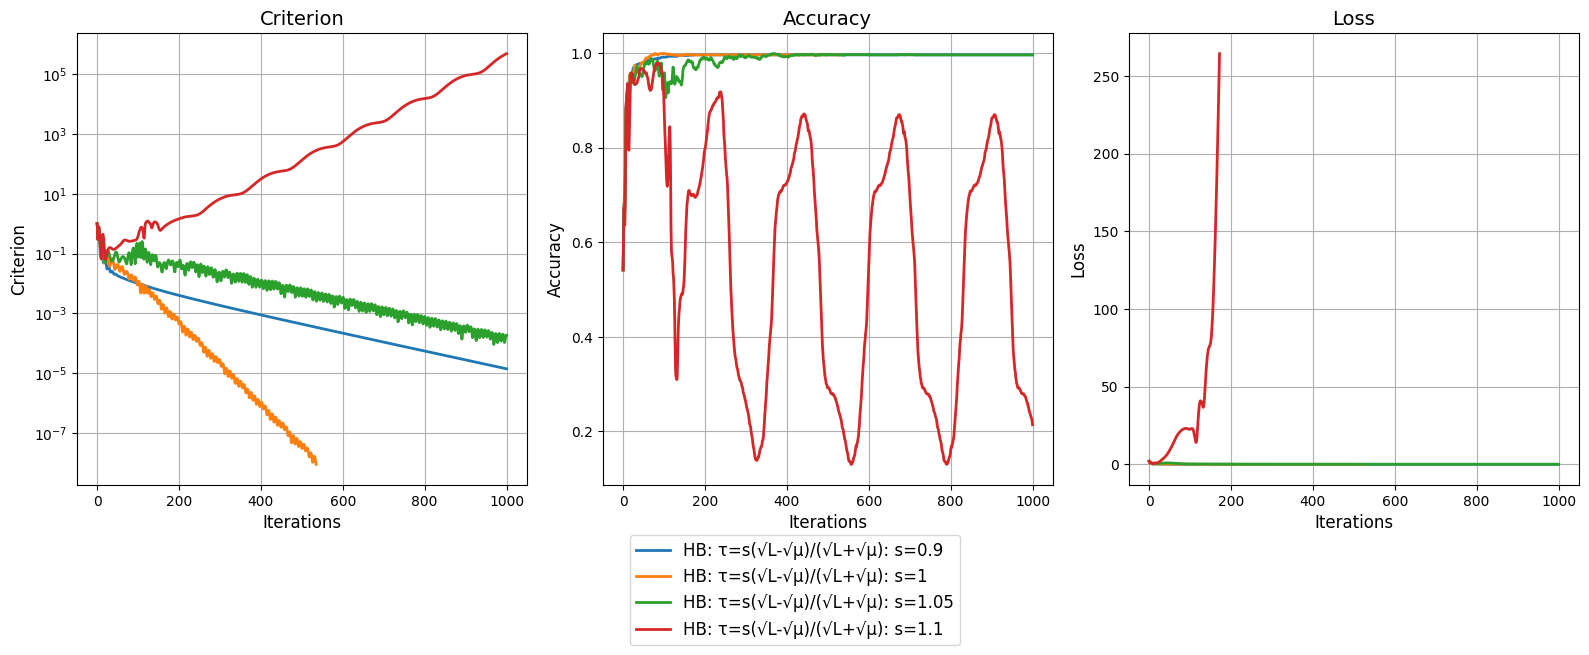

In [36]:
plot_metrics(experiments_3_1, bottom_offset=0.3)

In [31]:
2.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

def beta_k_s(s):
    # TODO: return a lambda function that depends on k
    return lambda k: k / (k + s)

experiments_3_2 = []
for s in [1, 2, 3]:
    heaby_ball_opt = HeavyBall(lr=1 / lipschitz_mush, beta=beta_k_s(s), init_w=start_w_mush,
                               name=f'HB: τ=k/(k+s): s={s}')
    res = test_optimizer(heaby_ball_opt)
    experiments_3_2.append(res)

HB: τ=k/(k+s): s=3: 100%|██████████| 1000/1000 [00:10<00:00, 92.80it/s, Loss=0.0834+0j, Accuracy=0.996, Grad norm=0.000123]


Лучший результат: $s=3$

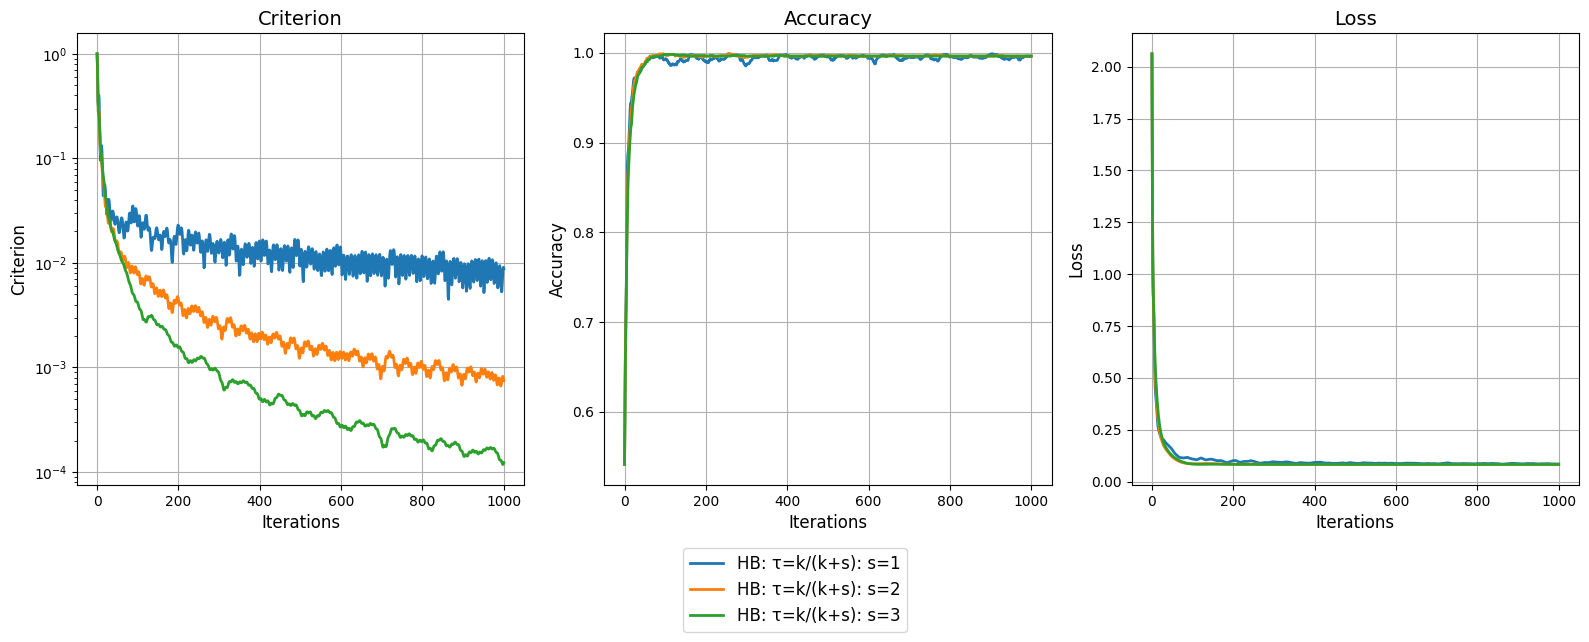

In [37]:
plot_metrics(experiments_3_2, bottom_offset=0.3)

In [33]:
3.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

beta_candidates = [
    (1 * (np.sqrt(lipschitz_mush) - np.sqrt(lambda_mush)) / (np.sqrt(lipschitz_mush) + np.sqrt(lambda_mush)), 'HB: τ=s(√L-√μ)/(√L+√μ): s=1'),
    (beta_k_s(3), 'HB: τ=k/(k+s): s=3')
]
experiments_3 = []
for beta, name in beta_candidates:
    heaby_ball_opt = HeavyBall(lr=1 / lipschitz_mush, beta=beta, init_w=start_w_mush, name=name)
    res = test_optimizer(heaby_ball_opt)
    experiments_3.append(res)

HB: τ=k/(k+s): s=3: 100%|██████████| 1000/1000 [00:10<00:00, 94.35it/s, Loss=0.0834+0j, Accuracy=0.996, Grad norm=0.000123]


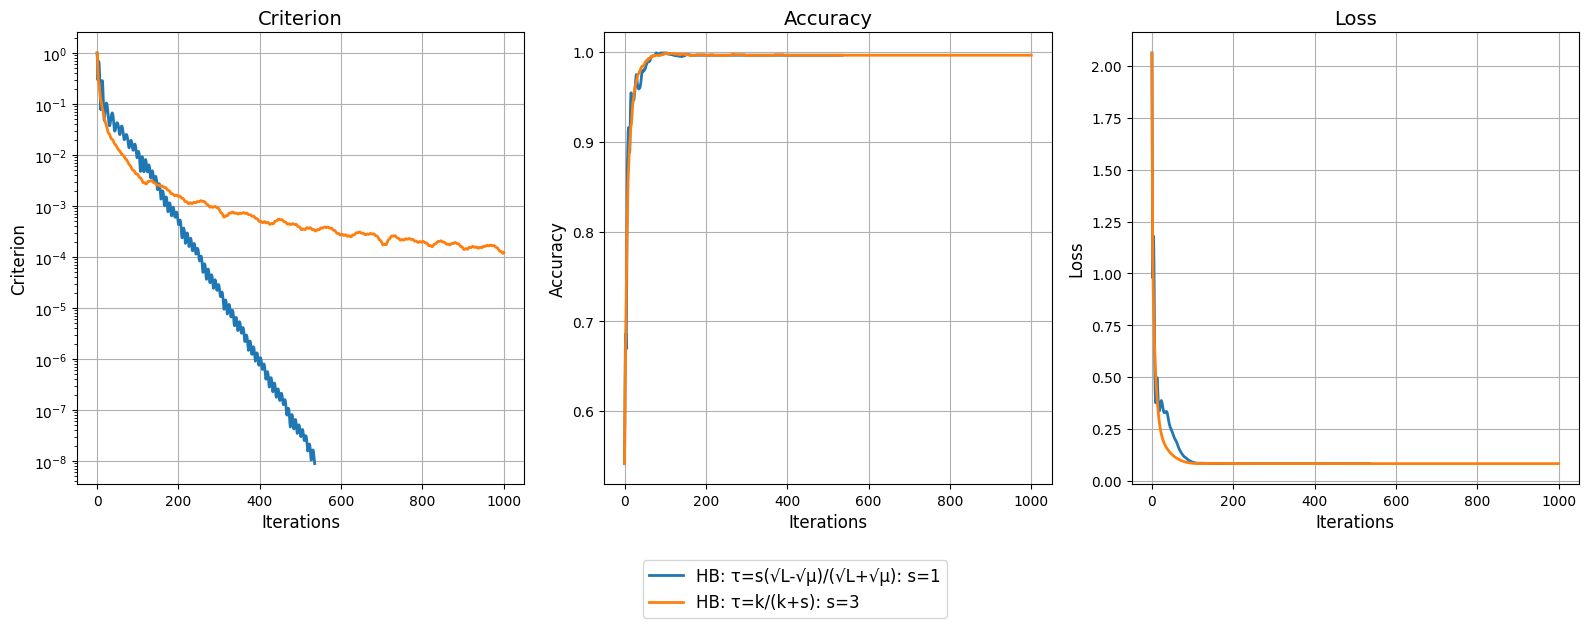

In [38]:
plot_metrics(experiments_3, bottom_offset=0.3)

Лучшего результата удалось достичь с $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ без окрестности, то есть при $s=1$.

In [56]:
best_final_hb_res = experiments_3[0]

### Задача 4 (1 балл)

Рассмотрим ускоренный градиентный метод (Nesterov Accelerated Gradient)

$$
\begin{align*}
& w_{k+1} = y_k - \gamma_k \nabla \mathcal{L}(y_k) \\
& y_{k+1} = w_{k+1} + \tau_k (w_{k+1} - w_k)
\end{align*}
$$

- Реализуйте шаг ускоренного градиентного метода
- Используйте шаг $\gamma = \frac{1}{L}$.
1. Рассмотрите моментум  $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и несколько моментумов в его окрестности: $s \cdot \tau$, где $s \in [0.9, 1.1]$. Рассмотрите не менее 3-х окрестностей.
2. Рассмотрите моментумы равные  $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ — номер итерации).
3. Сравните полученные результаты.

In [41]:
class NAG(ManualSolver):
    def __init__(self, lr, beta, init_w, name) -> None:
        super().__init__(lr, name, False, False)
        self.beta = beta if isinstance(beta, Callable) else lambda _: beta
        self.w_prev = init_w
        self.y_prev = init_w

    def step(self, w: np.ndarray, k: int, grad_f: None, hess_f: None) -> np.ndarray:
        # TODO: implement NAG iteration step
        # YOUR CODE HERE:
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        w = self.y_prev - self.lr(k) * mush_grad(self.y_prev)
        self.y_prev = w + self.beta(k) * (w - self.w_prev)
        self.w_prev = w
        return w

In [42]:
1.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
experiments_4_1 = []
for s in [0.9, 1, 1.05, 1.1]:
    nag_opt = NAG(lr=1 / lipschitz_mush,
                beta=s * (np.sqrt(lipschitz_mush) - np.sqrt(lambda_mush)) / (np.sqrt(lipschitz_mush) + np.sqrt(lambda_mush)),
                init_w=start_w_mush,
                name=f'NAG: τ=s(√L-√μ)/(√L+√μ): s={s}')
    res = test_optimizer(nag_opt)
    experiments_4_1.append(res)

NAG: τ=s(√L-√μ)/(√L+√μ): s=1.1:  18%|█▊        | 180/1000 [00:01<00:08, 94.00it/s, Loss=172+0j, Accuracy=0.796, Grad norm=0.723]  /tmp/ipykernel_934662/3269248495.py:7: RuntimeWarning: overflow encountered in exp
  return np.exp(-y * (x @ w))
NAG: τ=s(√L-√μ)/(√L+√μ): s=1.1:  23%|██▎       | 230/1000 [00:02<00:08, 90.68it/s, Loss=483+0j, Accuracy=0.582, Grad norm=1.4]  /home/pbedrin/.cache/pypoetry/virtualenvs/isp-ml1-2025-st-uCGrJTOC-py3.11/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
NAG: τ=s(√L-√μ)/(√L+√μ): s=1.1: 100%|██████████| 1000/1000 [00:10<00:00, 92.88it/s, Loss=inf+nanj, Accuracy=0.541, Grad norm=1.8e+5]


Лучший результат: $s=1$

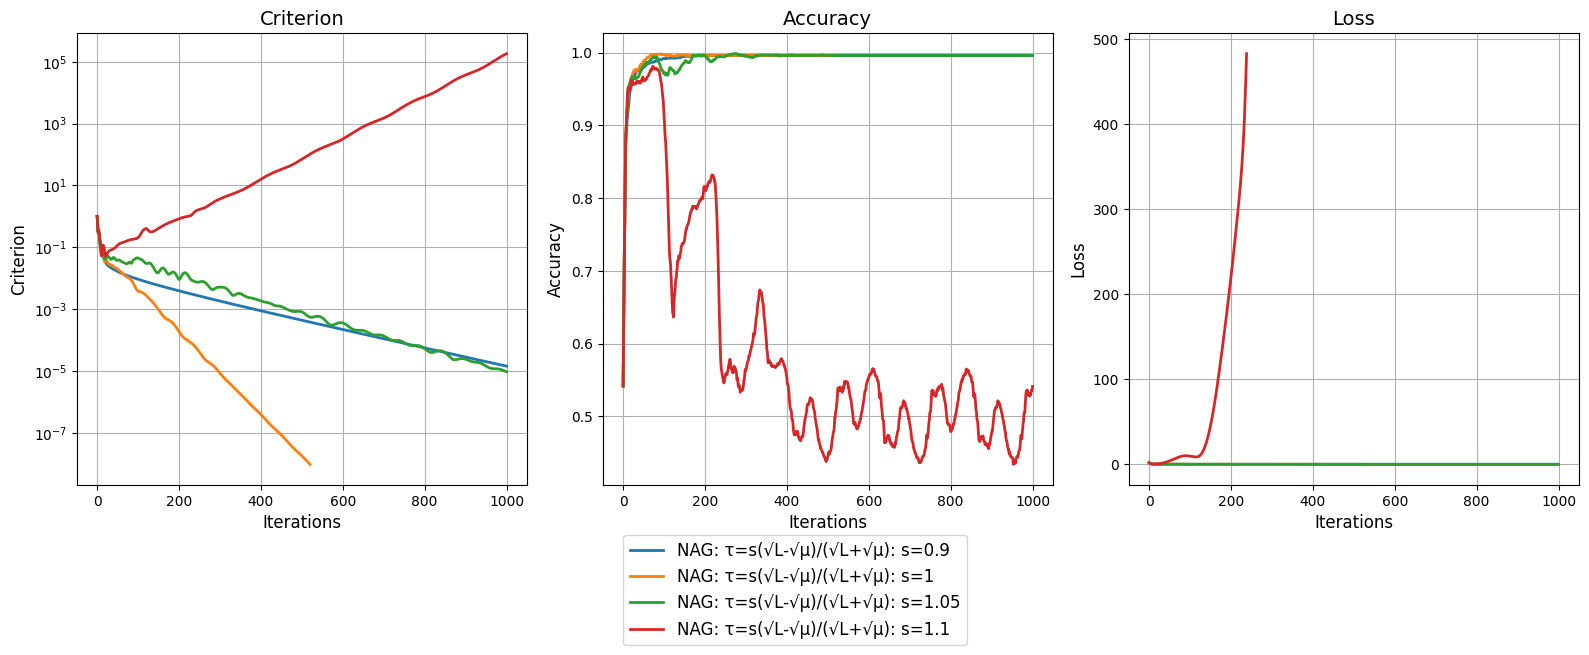

In [43]:
plot_metrics(experiments_4_1, bottom_offset=0.3)

In [44]:
2.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

def beta_k_s(s):
    # TODO: return a lambda function that depends on k
    return lambda k: k / (k + s)

experiments_4_2 = []
for s in [1, 2, 3]:
    nag_opt = NAG(lr=1 / lipschitz_mush, beta=beta_k_s(s), init_w=start_w_mush, name=f'NAG: τ=k/(k+s): s={s}')
    res = test_optimizer(nag_opt)
    experiments_4_2.append(res)

NAG: τ=k/(k+s): s=3: 100%|██████████| 1000/1000 [00:10<00:00, 92.55it/s, Loss=0.0834+0j, Accuracy=0.996, Grad norm=4.64e-5]


Лучший результат: $s=3$

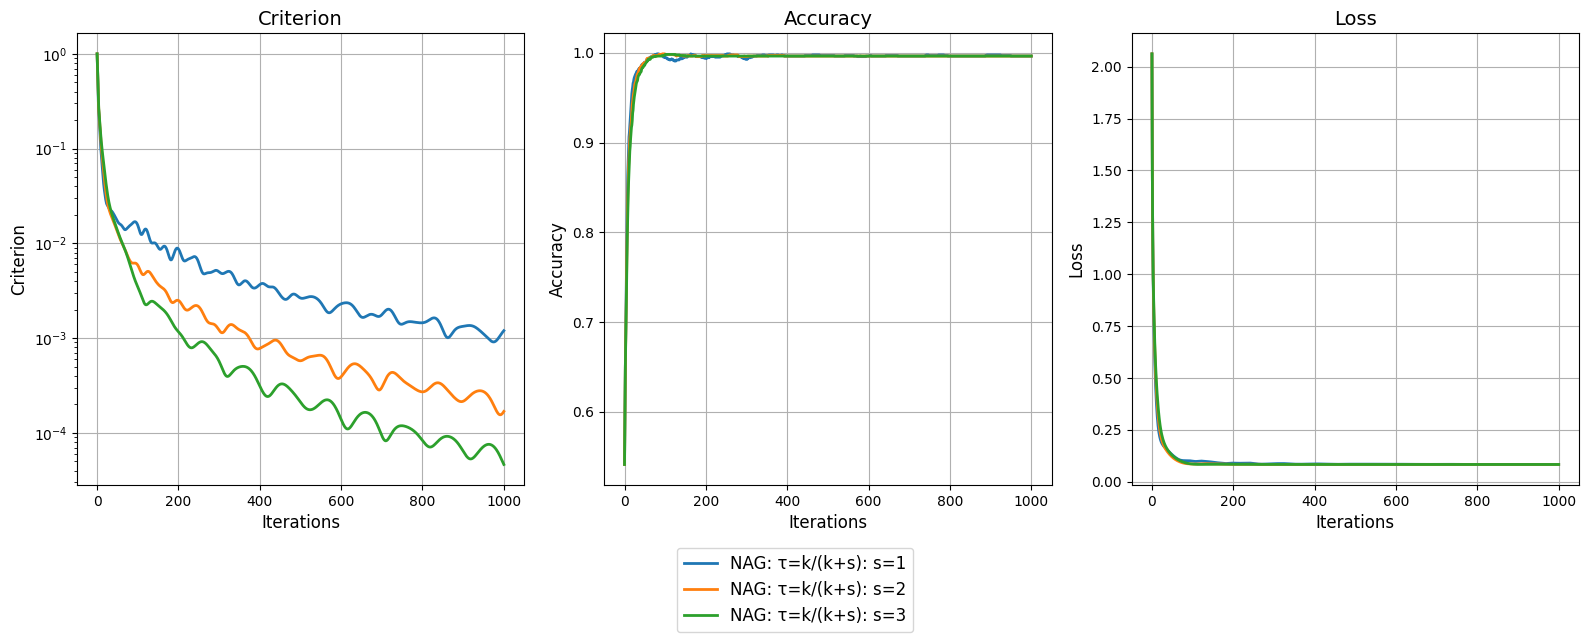

In [45]:
plot_metrics(experiments_4_2, bottom_offset=0.3)

In [46]:
3.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

beta_candidates = [
    (1 * (np.sqrt(lipschitz_mush) - np.sqrt(lambda_mush)) / (np.sqrt(lipschitz_mush) + np.sqrt(lambda_mush)), 'NAG: τ=s(√L-√μ)/(√L+√μ): s=1'),
    (beta_k_s(3), 'NAG: τ=k/(k+s): s=3')
]
experiments_4 = []
for beta, name in beta_candidates:
    nag_opt = NAG(lr=1 / lipschitz_mush, beta=beta, init_w=start_w_mush, name=name)
    res = test_optimizer(nag_opt)
    experiments_4.append(res)

NAG: τ=k/(k+s): s=3: 100%|██████████| 1000/1000 [00:09<00:00, 104.68it/s, Loss=0.0834+0j, Accuracy=0.996, Grad norm=4.64e-5]


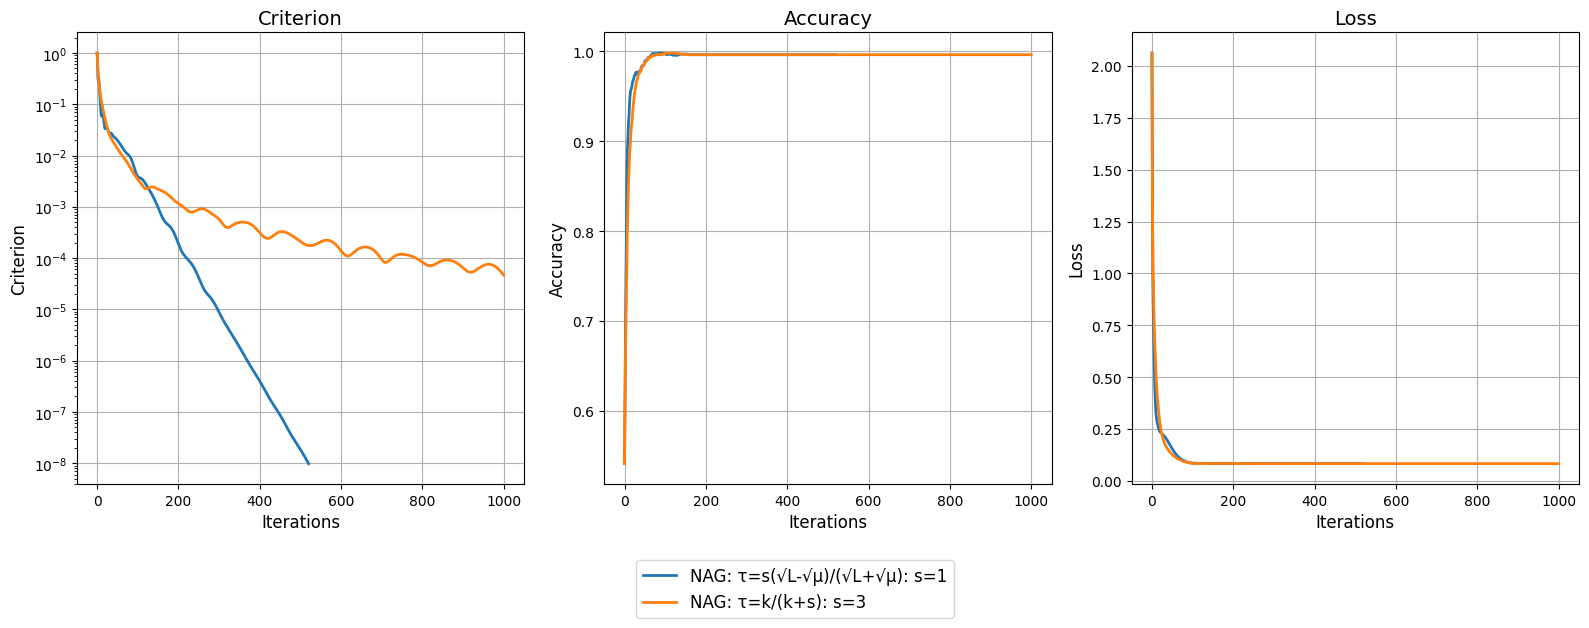

In [47]:
plot_metrics(experiments_4, bottom_offset=0.3)

Лучшего результата удалось достичь с $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ без окрестности, то есть при $s=1$.

In [57]:
best_final_nag_res = experiments_4[0]

### Задача 5 (1 балл)

Рассмотрим один из самых известных методов второго порядка - Метод Ньютона (Newton's method):

$$
w_{k+1} = w_k - \nabla^2\mathcal{L}(w^k)^{-1} \nabla \mathcal{L}(w^k)
$$

А точнее, его модификацию - демпфированный метод Ньютона (Dumped Newton's method):

$$
w_{k+1} = w_k - \gamma_k \nabla^2\mathcal{L}(w^k)^{-1} \nabla \mathcal{L}(w^k)
$$

- Реализуйте шаг демпфированного метода Ньютона
1.  Протестируйте различные $\gamma_k = \gamma = \frac{s}{L}$, где $s \in [0.5, 1.5]$, $L$ -- константа липшица в задаче. Рассмотрите не менее 3-х $s$.
2. Сравните полученные результаты.

In [51]:
class Newton(ManualSolver):
    def __init__(self, lr, name) -> None:
        super().__init__(lr, name, True, True)

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: np.ndarray) -> np.ndarray:
        # TODO: implement Newton iteration step
        # YOUR CODE HERE:
        ###########################
        ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        ###########################
        return w - self.lr(k) * np.linalg.inv(hess_f) @ grad_f

In [52]:
1.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
experiments_5_1 = []
for s in [0.5, 1, 1.5]:
    lr = s / lipschitz_mush
    newton_opt = Newton(lr=lr, name=f'Newton: γ_k=s/L: s={s} lr={lr:.3f}')
    res = test_optimizer(newton_opt)
    experiments_5_1.append(res)

Newton: γ_k=s/L: s=1.5 lr=0.580+0.000j:   0%|          | 5/1000 [00:00<02:38,  6.29it/s, Loss=99+0j, Accuracy=0.516, Grad norm=1.32]   /tmp/ipykernel_934662/3269248495.py:7: RuntimeWarning: overflow encountered in exp
  return np.exp(-y * (x @ w))
Newton: γ_k=s/L: s=1.5 lr=0.580+0.000j:   1%|          | 6/1000 [00:00<02:41,  6.14it/s, Loss=294+0j, Accuracy=0.481, Grad norm=1.63]/home/pbedrin/.cache/pypoetry/virtualenvs/isp-ml1-2025-st-uCGrJTOC-py3.11/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Newton: γ_k=s/L: s=1.5 lr=0.580+0.000j: 100%|██████████| 1000/1000 [02:57<00:00,  5.64it/s, Loss=inf+nanj, Accuracy=0.481, Grad norm=1.71]


Лучший результат: $s=1$

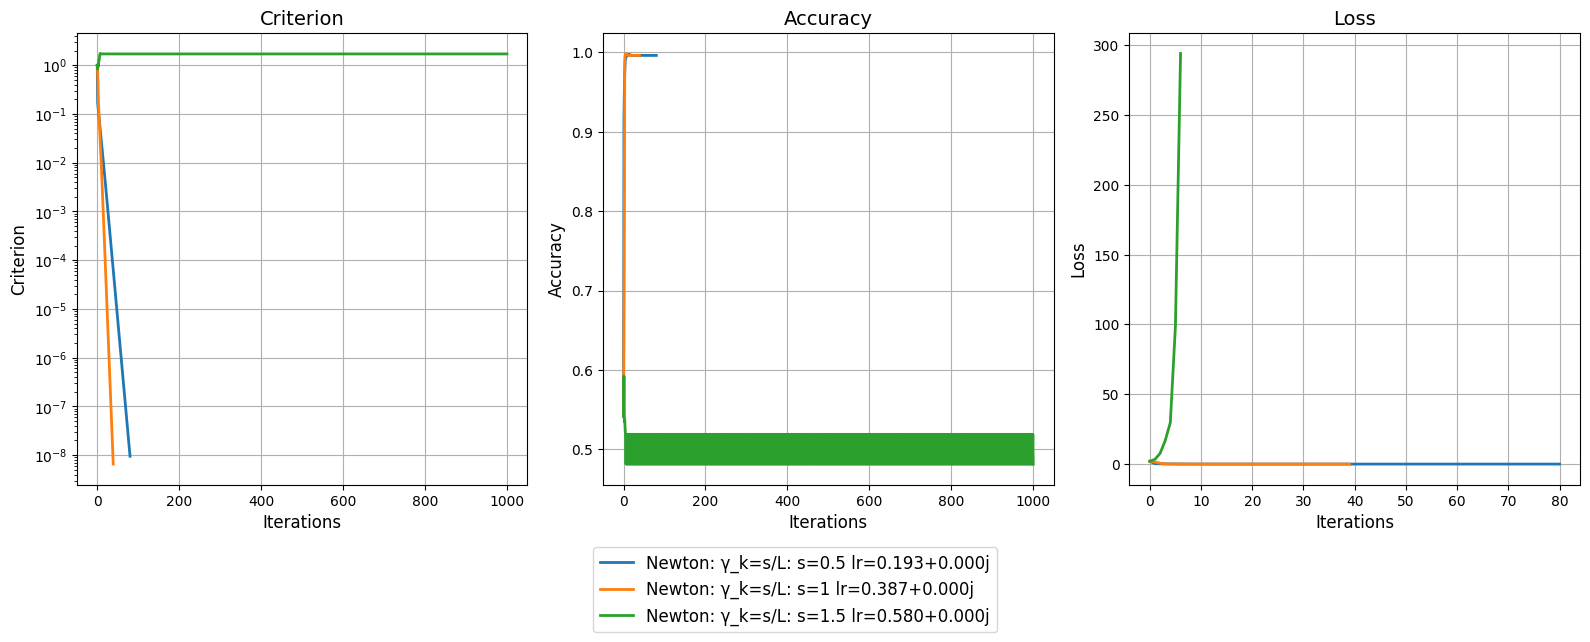

In [53]:
plot_metrics(experiments_5_1, bottom_offset=0.3)

In [ ]:
2.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

# Лучший результат определён шагом выше

In [58]:
best_final_newton_res = experiments_5_1[1]

### Сравнение лучших реализаций

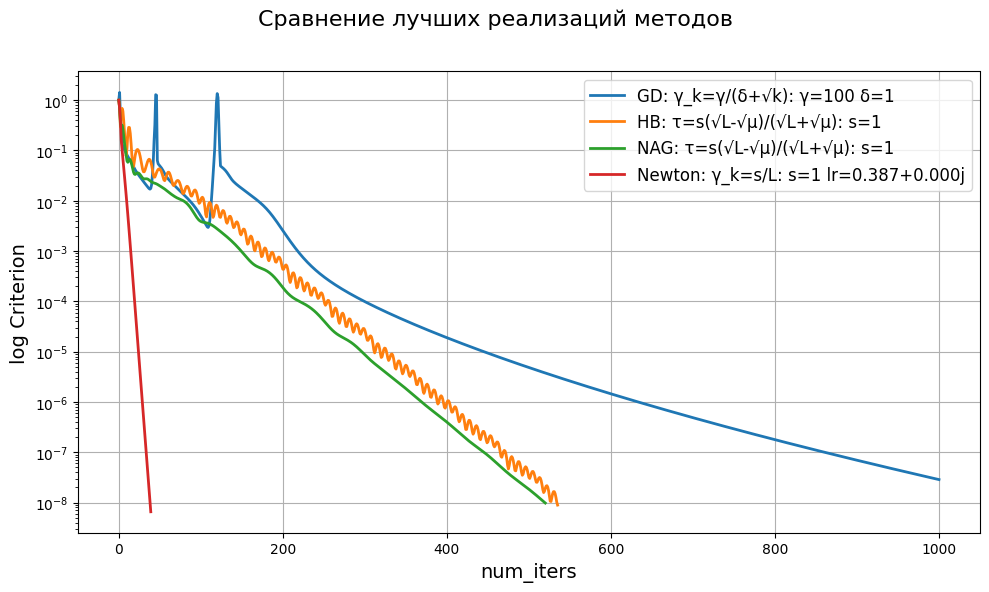

In [59]:
final_results = [best_final_gd_res, best_final_hb_res, best_final_nag_res, best_final_newton_res]
plot_results(final_results, 'Сравнение лучших реализаций методов', metrics_type=['Criterion'])

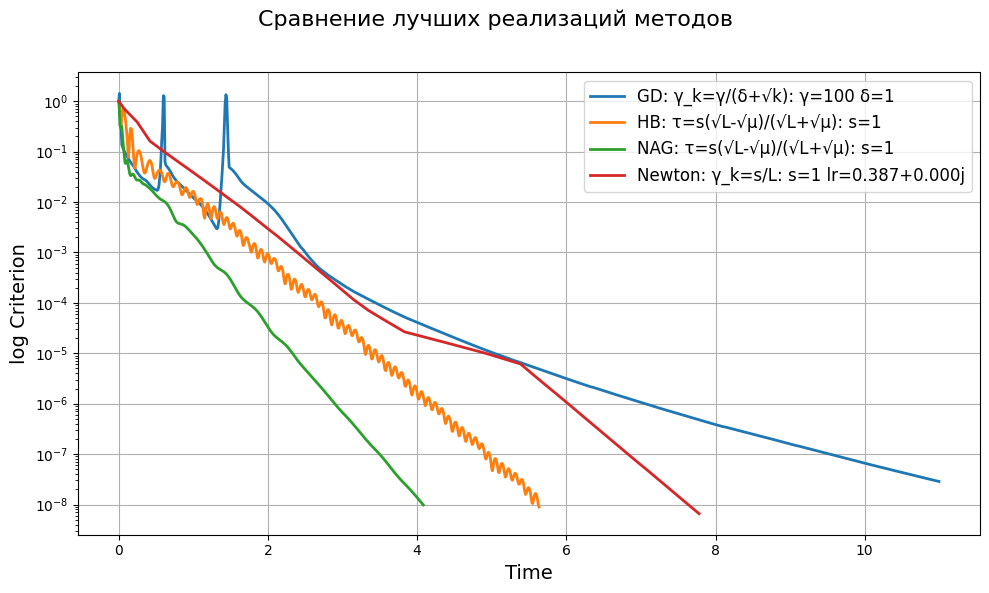

In [60]:
final_results = [best_final_gd_res, best_final_hb_res, best_final_nag_res, best_final_newton_res]
plot_results(final_results, 'Сравнение лучших реализаций методов', metrics_type=['Criterion'], x='Time')

### Ваши выводы (до 0.5 баллов):

1. Почему предложено выбирать $\gamma = \frac{s}{L}$, $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$?
2. Почему наблюдаются различия в графиках по количеству итераций и по времени?
3. Любые другие рассуждения приветствуются

1. $\gamma = \frac{s}{L}$ выбрана такой для гарантий сходимости, при $s \leq 1$ обеспечиваеется сходимость градиентного спуска для L-гладких выпуклых функций. Моментум $\tau = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ меньше 1, но близко к ней (~0.93), $L \gg \mu$. Такой моментум используется в теореме о сходимости ускоренного градиентного метода. Именнот такой моментум показал лучшую сходимость в наших экспериментах.
  
2. Заметно, что медленнее и по итерациям, и по времени работает классический градиентный спуск. По итерациям быстрее оказываются ускоренные методы HB и NAG, метод второго порядка Ньютона. Однако по времени метод Ньютона проигрывает ускоренным - требуется делать вычислительно затратную операцию вычисления гессиана с обращением.

### Задача 6* (1 балл)

Метод проксимального градиентного спуска используется для оптмизации композитной функции потерь
$$
h(w) = f(w) + g(w),
$$
где $f(w)$ является выпуклой дифференцируемой функцией на своей области определения. Особенностью является то, что $g(w)$ не обязательно должна быть дифференцируема всюду на своём множестве определения.  

Мы решаем задачу вида
$$
\min_{w\in \mathbb{R}^d}\{f(w) + R(w)\},
$$
где $R(w)$ -- выпуклый (возможно негладкий) регуляризатор. \\
Обновление параметров осуществляется по схеме
$$
w_{k+1} = prox_{\gamma R}(w_k - \gamma\nabla f(w)),
$$
где проксимальный оператор определяется как
$$
prox_{\gamma R}(v) = \arg\min_{w\in \mathbb{R}^d}\left\{\dfrac{1}{2\gamma}\|w - v\|^2 + R(w) \right\}.
$$

* Реализуйте шаг проксимального градиентного спуска для различных видов $R(w)$ (L1, L2-регуляризация).
1. Протестируйте различные $\gamma_k = \gamma = \frac{s}{L}$, где $L$ определяется согласно $R(w)$.
2. Сравните полученные результаты



In [61]:
class ProximalGradient(ManualSolver):
    def __init__(self, lr, name, reg):
        super().__init__(lr, name, True, False)
        self.reg = reg

    def prox(self, v: np.ndarray, lr: float) -> np.ndarray:
        if self.reg == 'L1':
            return np.sign(v) * np.maximum(np.abs(v) - lr * lambda_mush, 0.)
        elif self.reg == 'L2':
            return v / (1 + lr * lambda_mush)

    def step(self, w: np.ndarray, k: int, grad_f: np.ndarray, hess_f: None) -> np.ndarray:
        lr = self.lr(k)
        w_new = w - lr * grad_f
        return self.prox(w_new, lr)

In [67]:
1.
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
experiments_6 = []
for reg in ['L1', 'L2']:
    for s in [0.5, 1, 2, 3]:
        lr = s / lipschitz_mush
        prox_opt = ProximalGradient(lr=lr, name=f'Proximal Gradient: γ_k=s/L: s={s} reg={reg} lr={lr:.3E}', reg=reg)
        res = test_optimizer(prox_opt)
        experiments_6.append(res)

Proximal Gradient: γ_k=s/L: s=0.5 reg=L1 lr=1.933E-01+0.000E+00j:   0%|          | 0/1000 [00:00<?, ?it/s, Loss=1.2+0j, Accuracy=0.649, Grad norm=0.525]

Proximal Gradient: γ_k=s/L: s=0.5 reg=L1 lr=1.933E-01+0.000E+00j: 100%|██████████| 1000/1000 [00:08<00:00, 121.60it/s, Loss=0.105+0j, Accuracy=0.986, Grad norm=0.0135]
Proximal Gradient: γ_k=s/L: s=1 reg=L1 lr=3.865E-01+0.000E+00j: 100%|██████████| 1000/1000 [00:09<00:00, 104.48it/s, Loss=0.1+0j, Accuracy=0.986, Grad norm=0.0141] 
Proximal Gradient: γ_k=s/L: s=2 reg=L1 lr=7.730E-01+0.000E+00j: 100%|██████████| 1000/1000 [00:11<00:00, 86.31it/s, Loss=0.101+0j, Accuracy=0.986, Grad norm=0.0143]
Proximal Gradient: γ_k=s/L: s=3 reg=L1 lr=1.160E+00+0.000E+00j: 100%|██████████| 1000/1000 [00:11<00:00, 84.43it/s, Loss=0.101+0j, Accuracy=0.986, Grad norm=0.0143]
Proximal Gradient: γ_k=s/L: s=0.5 reg=L2 lr=1.933E-01+0.000E+00j: 100%|██████████| 1000/1000 [00:11<00:00, 86.77it/s, Loss=0.102+0j, Accuracy=0.988, Grad norm=0.011]
Proximal Gradient: γ_k=s/L: s=1 reg=L2 lr=3.865E-01+0.000E+00j: 100%|██████████| 1000/1000 [00:11<00:00, 83.38it/s, Loss=0.0915+0j, Accuracy=0.99, Grad norm=0.00884]
Proxi

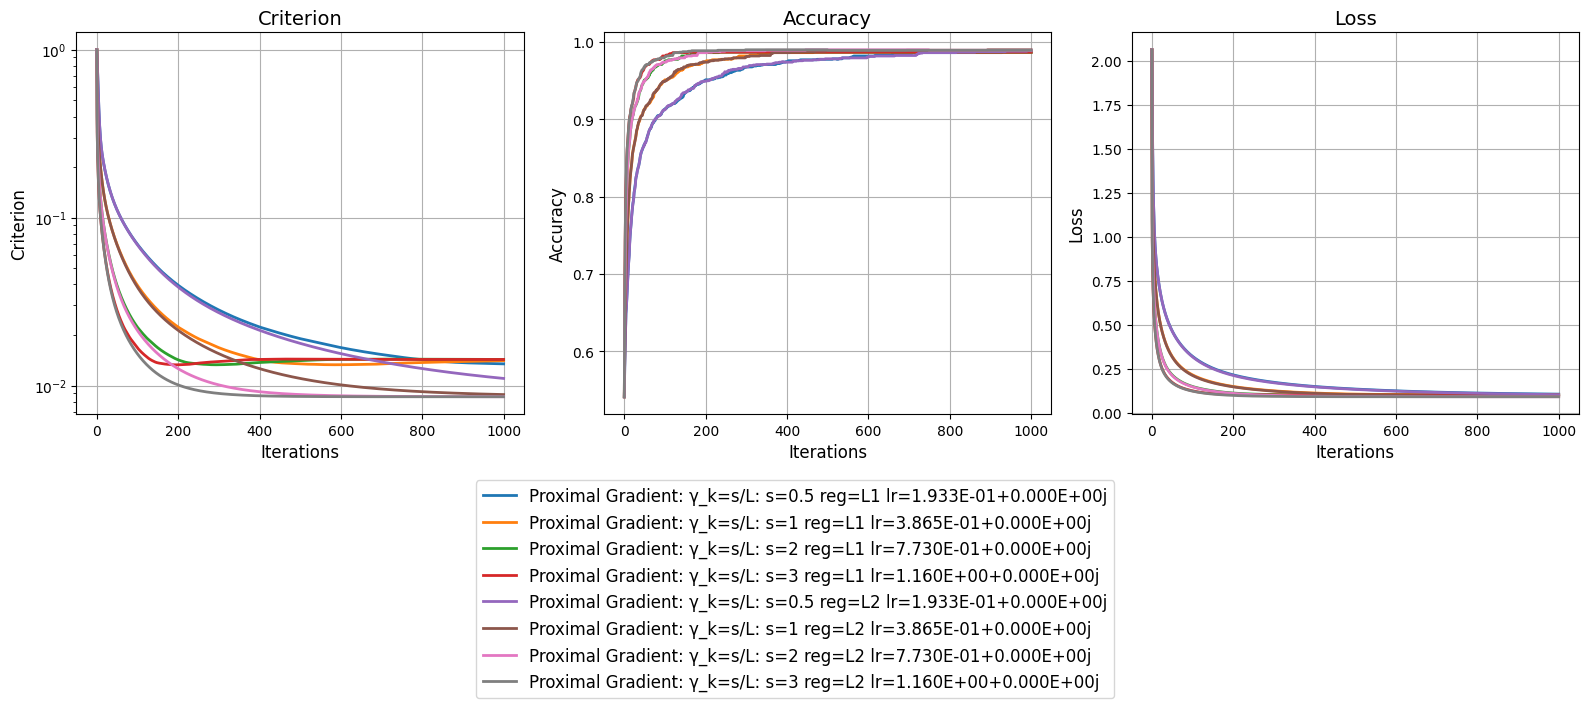

In [68]:
plot_metrics(experiments_6, bottom_offset=0.4)

**Вывод.**  Лучшим в эксперименте оказался L2-регуляризатор с шагом $\gamma_k = \gamma = \frac{3}{L} = 1.16$


## Задание 3: Предсказание погоды в Австралии

Датасет содержит ежедневные наблюдения погоды в различных регионах Австралии за период в 10 лет.

Предсказываемым признаком является `RainTomorrow`: "Будет ли завтра дождь?". Это задача бинарной классификации.

Скачиваем датасет

In [69]:
import pandas as pd
import seaborn as sns

In [187]:
url = 'https://huggingface.co/Anm5/rainpred/resolve/main/weatherAUS.csv'
filename = 'weatherAUS.csv'

response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)
df = pd.read_csv(filename)
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Задача 1 (3 балла): Анализ датасета

Датасет представляет собой табличные данные. В этом задании вы убедитесь, что основной объём работы в классификации таких данных с помощью методов машинного состоит в анализе датасета и его признаков.

Давайте выведем общую информацию о признаках в датасете

In [71]:
df.info()
print(f"Number of NaN targets: {df['RainTomorrow'].isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Можно заметить, что для некоторых примеров в датасете отсутствует разметка. Поскольку мы решаем задачу классификации с учителем, эти примеры нас не интересуют.

**Удалите из датасета сэмплы с отсутствующим значением `RainTomorrow`**.

In [188]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
# Output: `df` variable.
df = df[df['RainTomorrow'].notna()].reset_index(drop=True)

Выделим категориальные переменные

In [189]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('The categorical variables are :', categorical)
for feature in categorical:
    print(f"Number of unique {feature}:", df[feature].nunique())

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Number of unique Date: 3436
Number of unique Location: 49
Number of unique WindGustDir: 16
Number of unique WindDir9am: 16
Number of unique WindDir3pm: 16
Number of unique RainToday: 2
Number of unique RainTomorrow: 2


`RainTomorrow` является целевым признаком. `RainToday` нетрудно бинаризовать. Остальные признаки содержат большое количество значений.

В первом приближении, удалим признаки кроме `RainTomorrow`, `RainToday`. \\
**Важно:** датасет без категориальных признаков необходимо записать в отдельную переменную `df_numerical`. Исходный набор `df` пригодится в дополнительном задании. \\
**Бинаризуйте признаки `RainTomorrow`, `RainToday`. Остальные удалите**

In [190]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
# Output: `df_numerical` variable.

df_numerical = df.copy()
for col in ['RainTomorrow', 'RainToday']:
    df_numerical[col] = df_numerical[col].replace({'Yes': 1, 'No': 0})
df_numerical = df_numerical.drop(columns=[col for col in categorical if col not in ['RainTomorrow', 'RainToday']])
df_numerical.head()

/tmp/ipykernel_934662/1913868603.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numerical[col] = df_numerical[col].replace({'Yes': 1, 'No': 0})


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0


Перейдём к численным признакам

In [191]:
numerical = [var for var in df_numerical.columns if df_numerical[var].dtype!='O']
round(df_numerical[numerical].describe(), 2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,141556.00,141871.00,140787.00,81350.00,74377.00,132923.00,140845.00,139563.00,140419.00,138583.00,128179.00,128212.00,88536.00,85099.00,141289.00,139467.00,140787.00,142193.00
mean,12.19,23.23,2.35,5.47,7.62,39.98,14.00,18.64,68.84,51.48,1017.65,1015.26,4.44,4.50,16.99,21.69,0.22,0.22
std,6.40,7.12,8.47,4.19,3.78,13.59,8.89,8.80,19.05,20.80,7.11,7.04,2.89,2.72,6.49,6.94,0.42,0.42
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40,0.00,0.00
25%,7.60,17.90,0.00,2.60,4.90,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60,0.00,0.00
50%,12.00,22.60,0.00,4.80,8.50,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10,0.00,0.00
75%,16.80,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40,0.00,0.00
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70,1.00,1.00


Одним из важных аспектов обработки численных признаков является *опеределние выбросов (англ. outliers)*. С одной стороны, выбросы можно выделить для всех признаков. Однако, бывает полезно изучить, для каких фичей они более характерны. Это позволит избежать потери важной информации.

**Вам необходимо определить, для каких из численных признаков имеет смысл выделять выбросы.** \\
**Примечание:** Это можно сделать с помощью графика гистограммы. Отрисуйте зависимости всех числовых признаков от целевого `RainTomorrow`. По оси x отложите значения признака, по оси y -- плотность `RainTomorrow` (в результате на рисунке будут 2 графика для каждого из бинарных значений). Для этого воспользуйтесь функцией `seaborn.histplot` с аргументом `stat='density'`. По виду графика можно интерпретировать, для каких признаков существуют значительные выбросы.

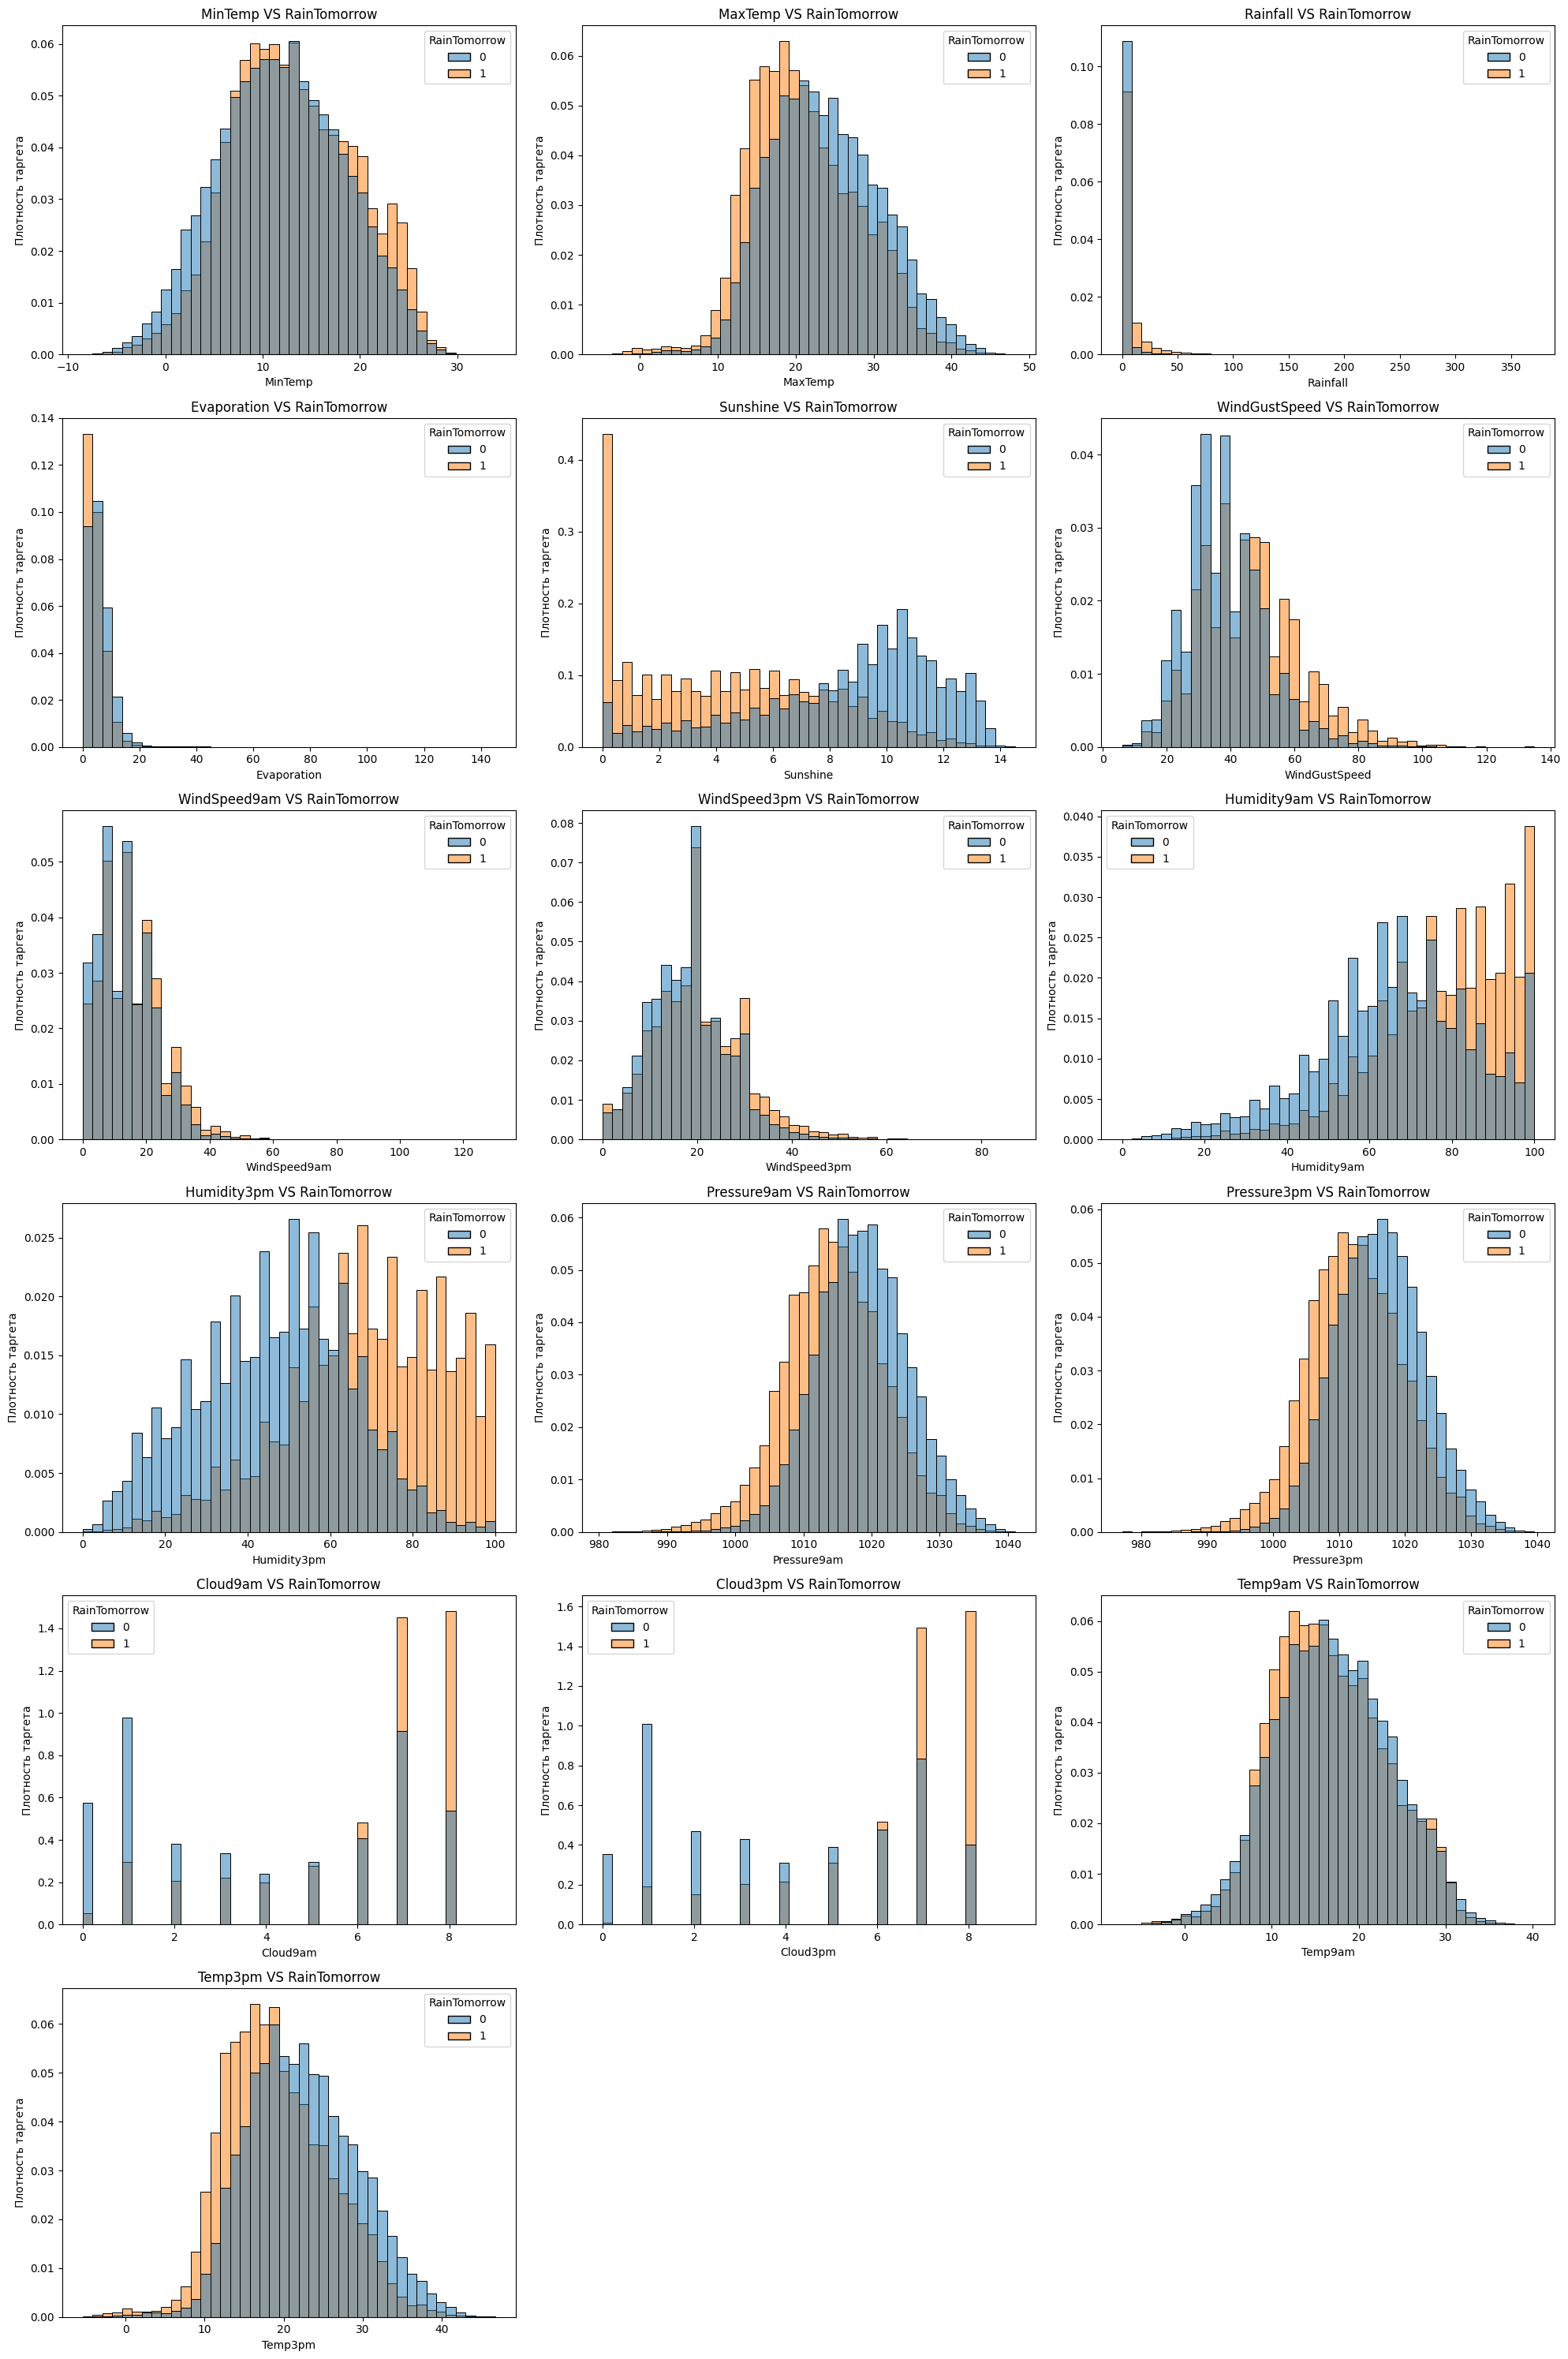

In [238]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 30))

needed_numerical = [feature for feature in numerical if feature not in ['RainTomorrow', 'RainToday']]
n_rows = (len(needed_numerical) + 2) // 3
n_cols = 3

for i, feature in enumerate(needed_numerical):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df_numerical, x=feature, hue='RainTomorrow', 
                 stat='density', common_norm=False, bins=42)
    plt.title(f'{feature} VS RainTomorrow')
    plt.xlabel(feature)
    plt.ylabel('Плотность таргета')

plt.tight_layout()
plt.show()

Графики признаков с выбросами имеют характерное *смещение (англ. skew)*. Для смещённых распределений, выбросы можно определить через *межквартильное расстояние (англ. Interquartile Range).*
$$
IQR = Q3 - Q1,
$$
где $Q3$ -- третий квартиль, соответствующий порогу $75\%$, $Q1$ -- первый квартиль, соответствующий порогу $25\%$.

Тогда выбросы определяют согласно правилу:
*  *Нижний выброс* -- $x < Q1 - 1.5\cdot IQR$, $x$ -- значение признака;
*  *Верхний выброс* -- $x > Q3 + 1.5\cdot IQR$.

Если в результате получилось слишком много выбросов, значение $1.5$ можно увеличить, выделяя более "явные".

**Для полученных числовых признаков выделите соответствующие выбросы с помощью $IQR$ с коэффициентом 2**.

In [343]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
# Output: `outliers` variable.

def get_outliers(df, numerical):
    outliers = pd.DataFrame(False, index=df.index, columns=numerical)
    for feature in numerical:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR
        
        feature_outliers = (df[feature] < lower_bound) | (df[feature] > upper_bound)
        feature_outliers_percentage = feature_outliers.mean() * 100
        
        outliers[feature] = feature_outliers
        
        print(f"{feature}: {feature_outliers_percentage:.2f}% выбросов")
    return outliers

outliers = get_outliers(df_numerical, needed_numerical)

MinTemp: 0.00% выбросов
MaxTemp: 0.01% выбросов
Rainfall: 16.46% выбросов
Evaporation: 0.72% выбросов
Sunshine: 0.00% выбросов
WindGustSpeed: 0.76% выбросов
WindSpeed9am: 0.52% выбросов
WindSpeed3pm: 0.46% выбросов
Humidity9am: 0.03% выбросов
Humidity3pm: 0.00% выбросов
Pressure9am: 0.16% выбросов
Pressure3pm: 0.11% выбросов
Cloud9am: 0.00% выбросов
Cloud3pm: 0.00% выбросов
Temp9am: 0.00% выбросов
Temp3pm: 0.02% выбросов


Есть 2 стратегии работы с выбросами:
*   Удалить соответствующий сэмпл;
*   Заменить его на среднее/медиану.

В первом приближении, удалим соответствующие примеры.

In [344]:
df_num_no_outliers = df_numerical[~outliers.any(axis=1)].reset_index(drop=True)

Базовый анализ датасета почти закончен! Осталось пара шагов 🤗 \\
Выделим целевой признак в соответствующую переменную. Посмотрим на пропуски в обучающей выборке.

In [345]:
X = df_num_no_outliers.drop(['RainTomorrow'], axis=1)
y = df_num_no_outliers['RainTomorrow']
X.isnull().sum()

MinTemp            550
MaxTemp            271
Rainfall          1367
Evaporation      49971
Sunshine         55727
WindGustSpeed     7347
WindSpeed9am      1150
WindSpeed3pm      2108
Humidity9am       1398
Humidity3pm       2857
Pressure9am      11616
Pressure3pm      11581
Cloud9am         45169
Cloud3pm         48005
Temp9am            721
Temp3pm           2157
RainToday         1367
dtype: int64

Пропуски необходимо заполнить. Обычно это делают с помощью среднего/медианы. Мы воспользуемся медианой, так как она более устойчива к выбросам.

**Заполните пропуски в обучающей выборке медианой.**

In [243]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
X = X.fillna(X.median())

Наконец, осталось провести нормализацию значений.

Разделим выборку на обучающую и тестовую, чтобы не учитывать масштаб на тесте.

In [245]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
count,93141.000000,93141.00000,93141.000000,93141.000000,93141.000000,93141.000000,93141.000000,93141.000000,93141.000000,93141.000000,93141.000000,93141.000000,93141.000000,93141.000000,93141.000000,93141.000000,93141.000000
mean,11.938048,23.75249,0.185955,5.261963,8.590182,38.423873,13.344961,18.106763,66.511096,48.559893,1018.403880,1015.768260,4.050042,4.112131,17.120715,22.213560,0.067553
std,6.442571,7.02233,0.467676,2.522629,2.666128,11.807978,8.252014,8.210321,18.609435,19.587320,6.376518,6.403141,2.259140,2.099334,6.509177,6.777678,0.250979
min,-8.500000,-2.70000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,0.000000,993.900000,991.400000,0.000000,0.000000,-5.300000,-2.900000,0.000000
25%,7.300000,18.50000,0.000000,4.400000,8.900000,31.000000,7.000000,13.000000,55.000000,35.000000,1014.400000,1011.600000,3.000000,3.000000,12.400000,17.300000,0.000000
50%,11.800000,23.30000,0.000000,5.000000,9.100000,37.000000,13.000000,17.000000,67.000000,49.000000,1018.300000,1015.700000,4.000000,4.000000,16.900000,21.700000,0.000000
75%,16.600000,28.70000,0.000000,5.600000,9.200000,44.000000,19.000000,24.000000,79.000000,62.000000,1022.300000,1019.800000,6.000000,5.000000,21.700000,26.800000,0.000000
max,33.900000,47.00000,2.400000,17.000000,14.500000,81.000000,43.000000,46.000000,100.000000,100.000000,1041.000000,1038.900000,9.000000,9.000000,40.200000,45.900000,1.000000


Для нормализации будем использовать `MinMaxScaler` модуля `sklearn.preprocessing`.

**Вам необходимо "обучить" (`fit`) scaler на `X_train` и использовать его на `X_test` (`transform`).** \\
**Примечание:** выходом `MinMaxScaler` является `np.array`. Чтобы в дальнейшем работать с выборкой, после масштабирования необходимо обратно перевести её в `pd.DataFrame`.

In [279]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
# Output: `X_train`, `X_test`: pd.DataFrame type.
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


### Задача 2 (5 баллов): Классификация



* Вам необходимо обучить обработанный датасет с помощью логистической регрессии.
* Вы можете пользоваться библиотекой `sklearn`
* Проведите классификацию с L1 и L2-регуляризацией. Какие признаки регуляризация lasso посчитала неинформативными?
* Проведите классификацию с регуляризацией [elasticnet](https://en.wikipedia.org/wiki/Elastic_net_regularization). Для этого воспользуйтесь поиском по сетке гиперпараметров (`GridSearchCV` модуля `sklearn.model_selection`). Пространство поиска определите константой `C = [1, 2, 5, 10, 100]` и значением `l1_ratio = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]`.
* Сделайте выводы по полученым результатам




In [291]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# L1
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
print(f"Accuracy для модели с регуляризацией l1: {accuracy_score(y_test, y_pred_l1)}")
print(classification_report(y_test, y_pred_l1))
feature2coef = pd.DataFrame({'Признак': X_train.columns, 'Коэффициент': model_l1.coef_[0]})
print(feature2coef.sort_values(by='Коэффициент', ascending=False))
print(f"Неинформативные признаки для регуляризации l1: {feature2coef[feature2coef['Коэффициент'] == 0]['Признак'].tolist()}")

Accuracy для модели с регуляризацией l1: 0.8646826419307738
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     19458
           1       0.67      0.34      0.45      3828

    accuracy                           0.86     23286
   macro avg       0.78      0.65      0.69     23286
weighted avg       0.85      0.86      0.85     23286

          Признак  Коэффициент
10    Pressure9am     5.980850
9     Humidity3pm     5.281460
5   WindGustSpeed     4.022582
13       Cloud3pm     1.310360
2        Rainfall     0.941036
15        Temp3pm     0.577526
14        Temp9am     0.241471
8     Humidity9am     0.034977
12       Cloud9am     0.000000
0         MinTemp    -0.099112
16      RainToday    -0.221699
3     Evaporation    -0.235994
6    WindSpeed9am    -0.501395
1         MaxTemp    -0.702339
7    WindSpeed3pm    -1.398255
4        Sunshine    -1.452940
11    Pressure3pm    -9.579004
Неинформативные признаки для регуляризации l1: ['Cloud9

In [289]:
# L2
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print(f"Accuracy для модели с регуляризацией l2: {accuracy_score(y_test, y_pred_l2)}")
print(classification_report(y_test, y_pred_l2))

Accuracy для модели с регуляризацией l2: 0.8646396976724212
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     19458
           1       0.67      0.34      0.45      3828

    accuracy                           0.86     23286
   macro avg       0.78      0.65      0.69     23286
weighted avg       0.85      0.86      0.85     23286



In [290]:
# elasticnet

param_grid = {
    'C': [1, 2, 5, 10, 100],
    'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000), param_grid)
grid_search.fit(X_train, y_train)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность на 5-fold-валидации: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_pred_elasticnet = best_model.predict(X_test)
print(f"Accuracy для модели с регуляризацией elasticnet: {accuracy_score(y_test, y_pred_elasticnet)}")
print(classification_report(y_test, y_pred_elasticnet))

Лучшие параметры: {'C': 1, 'l1_ratio': 0.0}
Лучшая точность на 5-fold-валидации: 0.864162907806862
Accuracy для модели с регуляризацией elasticnet: 0.8647255861891265
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     19458
           1       0.68      0.34      0.45      3828

    accuracy                           0.86     23286
   macro avg       0.78      0.65      0.69     23286
weighted avg       0.85      0.86      0.85     23286



**Вывод**. Результаты на разных регуляризациях очень близки. Тем не менее, по метрике точности на тестовой выборе лучший результат 0.8647 получен на ElasticNet, C = 1, l1_ratio = 0.

### Задача 3* (2 балла): Категориальные признаки

* В ходе анализа датасета было сделано несколько упрощений:
    * Категориальные признаки были опущены (`df --> df_numerical`);
    * Выбросы были опущены (`df_numerical --> df_num_no_outliers`).
* Необходимо провести обработку категориальных признаков.
* Протестировать качество логистической регрессии и подобрать гиперпараметры на различных вариантах:
    * С категориальными признаками и без учета выбросов;
    * Без категориальных признаков, с учетом выбросов;
    * С категориальными признаками, с учетом выбросов.
* Поощеряется изобретательность. Возможно, какие-то категориальные/численные признаки покажутся менее инфомативными. \\

\\

\\

* P.S. Не расстраивайтесь, если выдвигаемые гипотезы не дадут прибавки в качестве. У автора не хватило времени предложить более комплексный датасет 😞. Важен сам пайплайн проверки выдвигаемых гипотез)

**1 вариант. С категориальными без выбросов**
1. Категориальные признаки закодируем через OHE. Признак локации (около 50 уникальных значений) кажется неинформативным - его попробуем удалить. Пропуски заполним медианой и наиболее часто встречающимся значением.

In [371]:
df_processed = df.copy()

# Бинаризация
for col in ['RainToday', 'RainTomorrow']:
    df_processed[col] = df_processed[col].replace({'Yes': 1, 'No': 0})

# One Hot Encoding для направлений ветра
wind_direction_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
df_processed = pd.get_dummies(df_processed, columns=wind_direction_columns, drop_first=True)
bool_columns = df_processed.select_dtypes(include=['bool']).columns
for col in bool_columns:
    df_processed[col] = df_processed[col].astype(int)

# Тригонометрическое кодирование для дня года и месяца (сохранить цикличность)
df_processed['Date'] = pd.to_datetime(df_processed['Date'])
df_processed['Month'] = df_processed['Date'].dt.month
df_processed['DayOfYear'] = df_processed['Date'].dt.dayofyear
df_processed['Month_sin'] = np.sin(2 * np.pi * df_processed['Month'] / 12)
df_processed['Month_cos'] = np.cos(2 * np.pi * df_processed['Month'] / 12)
df_processed['DayOfYear_sin'] = np.sin(2 * np.pi * df_processed['DayOfYear'] / 365)
df_processed['DayOfYear_cos'] = np.cos(2 * np.pi * df_processed['DayOfYear'] / 365)

df_processed = df_processed.drop('Location', axis=1)
df_processed = df_processed.drop(['Date', 'Month', 'DayOfYear'], axis=1)

float_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
                 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Fill NaN через медиану / наиболее частое значение
for col in df_processed.columns:
    if df_processed[col].isna().any():
        if col in float_columns:
            df_processed[col] = df_processed[col].fillna(df_processed[col].median())
        else:
            df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])


/tmp/ipykernel_934662/3442690396.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed[col] = df_processed[col].replace({'Yes': 1, 'No': 0})


In [372]:
df_processed.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,Month_sin,Month_cos,DayOfYear_sin,DayOfYear_cos
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,1,0,-2.449294e-16,1.0,-0.478734,0.877960
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,1,-2.449294e-16,1.0,-0.463550,0.886071
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,1,-2.449294e-16,1.0,-0.448229,0.893919
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,-2.449294e-16,1.0,-0.432776,0.901502
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,-2.449294e-16,1.0,-0.417194,0.908818


2. Выбросы удалим.

In [373]:
outliers = get_outliers(df_processed, float_columns)
df_processed_outliers = df_processed.copy()
for col in float_columns:
    outlier_mask = outliers[col]
    df_processed_outliers.loc[outlier_mask, col] = df_processed_outliers[col].median()

MinTemp: 0.00% выбросов
MaxTemp: 0.01% выбросов
Rainfall: 19.23% выбросов
Evaporation: 13.83% выбросов
Sunshine: 39.79% выбросов
WindGustSpeed: 1.41% выбросов
WindSpeed9am: 0.52% выбросов
WindSpeed3pm: 0.46% выбросов
Humidity9am: 0.03% выбросов
Humidity3pm: 0.00% выбросов
Pressure9am: 0.44% выбросов
Pressure3pm: 0.31% выбросов
Cloud9am: 0.00% выбросов
Cloud3pm: 0.00% выбросов
Temp9am: 0.00% выбросов
Temp3pm: 0.03% выбросов


3. Формируем сплиты. Делаем MinMaxScaling.

In [376]:
X = df_processed_outliers.drop(['RainTomorrow'], axis=1)
y = df_processed_outliers['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [377]:
scaler = MinMaxScaler()
scaler.fit(X_train[float_columns])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[float_columns] = scaler.transform(X_train[float_columns])
X_test_scaled[float_columns] = scaler.transform(X_test[float_columns])

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

4. Обучаем логистическую регрессию с ElasticNet регуляризацией (она показала себя лучшей на предыдущих шагах)

In [378]:
param_grid = {
    'C': [1, 2, 5, 10, 100],
    'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000), param_grid)
grid_search.fit(X_train, y_train)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность на 5-fold-валидации: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_pred_elasticnet = best_model.predict(X_test)
print(f"Accuracy для модели с регуляризацией elasticnet: {accuracy_score(y_test, y_pred_elasticnet)}")
print(classification_report(y_test, y_pred_elasticnet))

Лучшие параметры: {'C': 5, 'l1_ratio': 0.8}
Лучшая точность на 5-fold-валидации: 0.8407879965667491
Accuracy для модели с регуляризацией elasticnet: 0.8390590386441155
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22098
           1       0.70      0.49      0.58      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439



**2 вариант. С категориальными с выбросами**


In [379]:
X = df_processed.drop(['RainTomorrow'], axis=1)
y = df_processed['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [380]:
scaler = MinMaxScaler()
scaler.fit(X_train[float_columns])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[float_columns] = scaler.transform(X_train[float_columns])
X_test_scaled[float_columns] = scaler.transform(X_test[float_columns])

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [381]:
param_grid = {
    'C': [1, 2, 5, 10, 100],
    'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000), param_grid)
grid_search.fit(X_train, y_train)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность на 5-fold-валидации: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_pred_elasticnet = best_model.predict(X_test)
print(f"Accuracy для модели с регуляризацией elasticnet: {accuracy_score(y_test, y_pred_elasticnet)}")
print(classification_report(y_test, y_pred_elasticnet))

Лучшие параметры: {'C': 100, 'l1_ratio': 0.6}
Лучшая точность на 5-fold-валидации: 0.8444362191542358
Accuracy для модели с регуляризацией elasticnet: 0.8415556102535251
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22098
           1       0.70      0.50      0.58      6341

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.74     28439
weighted avg       0.83      0.84      0.83     28439



**3 вариант. Без категориальных с выбросами**



In [382]:
df_processed = df.copy()

# Бинаризация таргета RainTomorrow
df_processed['RainTomorrow'] = df_processed['RainTomorrow'].replace({'Yes': 1, 'No': 0})
columns_to_keep = float_columns + ['RainTomorrow']
df_processed = df_processed[columns_to_keep]

# Fill NaN через медиану и наиболее частое значение
for col in df_processed.columns:
    if df_processed[col].isna().any():
        if col in float_columns:
            df_processed[col] = df_processed[col].fillna(df_processed[col].median())
        else:
            df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])

df_processed.head()


/tmp/ipykernel_934662/3139218985.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_processed['RainTomorrow'] = df_processed['RainTomorrow'].replace({'Yes': 1, 'No': 0})


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [383]:
X = df_processed.drop(['RainTomorrow'], axis=1)
y = df_processed['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [384]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [385]:
param_grid = {
    'C': [1, 2, 5, 10, 100],
    'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid_search = GridSearchCV(LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000), param_grid)
grid_search.fit(X_train, y_train)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность на 5-fold-валидации: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_pred_elasticnet = best_model.predict(X_test)
print(f"Accuracy для модели с регуляризацией elasticnet: {accuracy_score(y_test, y_pred_elasticnet)}")
print(classification_report(y_test, y_pred_elasticnet))

Лучшие параметры: {'C': 5, 'l1_ratio': 0.5}
Лучшая точность на 5-fold-валидации: 0.8419308239560538
Accuracy для модели с регуляризацией elasticnet: 0.8381448011533458
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22098
           1       0.70      0.48      0.57      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439



**Выводы.**
* Результаты в трёх вариантах получились очень близкими между собой.
* Мера Accuracy на тестовой выборке (около 0.84) получилась немного ниже, чем в Задаче 2. Лучший результат в Задаче 3: 0.841, вариант "С категориальными с выбросами", ElasticNet, C = 100, l1_ratio = 0.6.
* Precision, Recall, F1 для класса 1 сильно вырос при почти не изменившихся метриках класса 0 по сравнению с Задачей 2.